# Assn 5 Task 4 Capstone Project

# Evaluate Techniques for Wifi Locationing

## Celeste Hofer

### June 23, 2019

# Import Libraries

In [245]:
import pandas as pd

In [246]:
import matplotlib.pyplot as plt

In [247]:
import numpy as np

In [248]:
import scipy

In [249]:
from math import sqrt

In [250]:
import os

In [251]:
import seaborn as sns

In [252]:
from sklearn.model_selection import train_test_split  

In [253]:
from sklearn.model_selection import KFold

In [254]:
from sklearn.model_selection import RepeatedKFold

In [255]:
from sklearn.feature_selection import VarianceThreshold

In [256]:
from pandas.plotting import scatter_matrix

In [257]:
from pandas import Series, DataFrame

In [258]:
import pickle

In [259]:
from sklearn.decomposition import PCA

In [260]:
from sklearn.feature_selection import RFE

In [261]:
import warnings

In [262]:
from sklearn.metrics import classification_report

In [1027]:
from sklearn.metrics import confusion_matrix

In [264]:
from yellowbrick.classifier import ClassificationReport

In [265]:
from sklearn.metrics import roc_curve

In [266]:
# from pandas import HDFStore

In [268]:
from sklearn.ensemble import RandomForestRegressor

In [269]:
from sklearn.linear_model import LinearRegression

In [270]:
from sklearn.svm import SVR

In [271]:
from sklearn import linear_model

In [1063]:
from sklearn.metrics import cohen_kappa_score

In [273]:
from sklearn import tree

In [274]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [275]:
from sklearn.naive_bayes import GaussianNB

In [276]:
from sklearn.neighbors import KNeighborsClassifier

In [277]:
from sklearn.tree import DecisionTreeClassifier

In [278]:
from sklearn.linear_model import SGDClassifier

In [279]:
from sklearn.svm import SVC, LinearSVC, NuSVC

In [280]:
from sklearn.ensemble import AdaBoostClassifier 

In [281]:
from sklearn.ensemble import GradientBoostingClassifier

In [282]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [283]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.neural_network import MLPClassifier

In [285]:
from sklearn.metrics import mean_squared_error

In [286]:
from sklearn.metrics import r2_score

In [287]:
from sklearn.model_selection import cross_val_score

In [288]:
# for classification 
# https://dataaspirant.com/2017/02/20/gaussian-naive-bayes-classifier-implementation-python/
from sklearn.metrics import accuracy_score

In [289]:
from sklearn.model_selection import GridSearchCV

In [290]:
from sklearn.model_selection import RandomizedSearchCV

In [291]:
from sklearn.metrics import make_scorer

In [294]:
from sklearn import preprocessing

In [296]:
from sklearn.preprocessing import MinMaxScaler

In [297]:
from sklearn.preprocessing import RobustScaler

In [298]:
from sklearn.preprocessing import MaxAbsScaler

In [299]:
from sklearn.preprocessing import StandardScaler

In [300]:
from dfply import *

# Miscellaneous

In [301]:
# Hide Warninga as they cause noise
warnings.simplefilter('ignore')

# Read Data Set using Pandas

In [302]:
# Determine current working directory
pwd = os.getcwd()
print(pwd)

/Users/celestehofer/Desktop/Austin_DS_Program/Assn5_Task4


In [303]:
# Change the directory where our file is
pwd = os.chdir('/Users/celestehofer/Desktop/Austin_DS_Program/Assn5_Task4')
print(os.getcwd())

/Users/celestehofer/Desktop/Austin_DS_Program/Assn5_Task4


In [304]:
# read data set using pandas
ds_complete = pd.read_csv('trainingData.csv')

# Analyze and Evaluate Data

##  Data Analysis on trainingData.csv

In [305]:
# retrieve first 5 rows
ds_complete.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [306]:
# retrieve last 5 rows
ds_complete.tail()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049
19936,100,100,100,100,100,100,100,100,100,100,...,100,-7536.1658,4.864898e+06,3,1,112,2,18,10,1371711025


In [307]:
ds_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [308]:
ds_complete.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [309]:
ds_complete.dtypes

WAP001                int64
WAP002                int64
WAP003                int64
WAP004                int64
WAP005                int64
WAP006                int64
WAP007                int64
WAP008                int64
WAP009                int64
WAP010                int64
WAP011                int64
WAP012                int64
WAP013                int64
WAP014                int64
WAP015                int64
WAP016                int64
WAP017                int64
WAP018                int64
WAP019                int64
WAP020                int64
WAP021                int64
WAP022                int64
WAP023                int64
WAP024                int64
WAP025                int64
WAP026                int64
WAP027                int64
WAP028                int64
WAP029                int64
WAP030                int64
                     ...   
WAP500                int64
WAP501                int64
WAP502                int64
WAP503                int64
WAP504              

In [1111]:
# get col names
column_names = ds_complete.columns
print(column_names)

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)


In [311]:
# is column name unique
for i in column_names:
  print('{} is unique: {}'.format(i, ds_complete[i].is_unique))

WAP001 is unique: False
WAP002 is unique: False
WAP003 is unique: False
WAP004 is unique: False
WAP005 is unique: False
WAP006 is unique: False
WAP007 is unique: False
WAP008 is unique: False
WAP009 is unique: False
WAP010 is unique: False
WAP011 is unique: False
WAP012 is unique: False
WAP013 is unique: False
WAP014 is unique: False
WAP015 is unique: False
WAP016 is unique: False
WAP017 is unique: False
WAP018 is unique: False
WAP019 is unique: False
WAP020 is unique: False
WAP021 is unique: False
WAP022 is unique: False
WAP023 is unique: False
WAP024 is unique: False
WAP025 is unique: False
WAP026 is unique: False
WAP027 is unique: False
WAP028 is unique: False
WAP029 is unique: False
WAP030 is unique: False
WAP031 is unique: False
WAP032 is unique: False
WAP033 is unique: False
WAP034 is unique: False
WAP035 is unique: False
WAP036 is unique: False
WAP037 is unique: False
WAP038 is unique: False
WAP039 is unique: False
WAP040 is unique: False
WAP041 is unique: False
WAP042 is unique

In [312]:
# gives us the # of rows and columns
ds_complete.shape

(19937, 529)

In [313]:
ds_complete['BUILDINGID'].value_counts()

2    9492
0    5249
1    5196
Name: BUILDINGID, dtype: int64

In [314]:
# ds_complete.min()

In [315]:
# ds_complete.max()

In [316]:
ds_complete.count()

WAP001              19937
WAP002              19937
WAP003              19937
WAP004              19937
WAP005              19937
WAP006              19937
WAP007              19937
WAP008              19937
WAP009              19937
WAP010              19937
WAP011              19937
WAP012              19937
WAP013              19937
WAP014              19937
WAP015              19937
WAP016              19937
WAP017              19937
WAP018              19937
WAP019              19937
WAP020              19937
WAP021              19937
WAP022              19937
WAP023              19937
WAP024              19937
WAP025              19937
WAP026              19937
WAP027              19937
WAP028              19937
WAP029              19937
WAP030              19937
                    ...  
WAP500              19937
WAP501              19937
WAP502              19937
WAP503              19937
WAP504              19937
WAP505              19937
WAP506              19937
WAP507      

## Plot Data

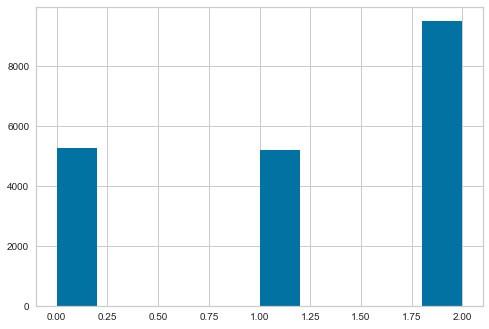

In [317]:
ds_complete['BUILDINGID'].hist()

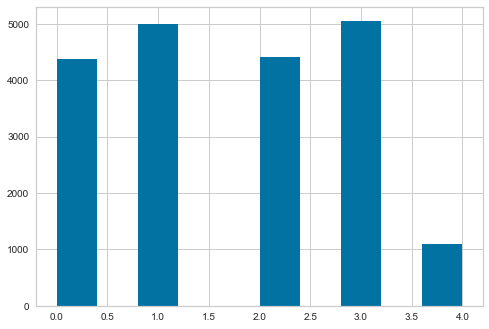

In [318]:
ds_complete['FLOOR'].hist()

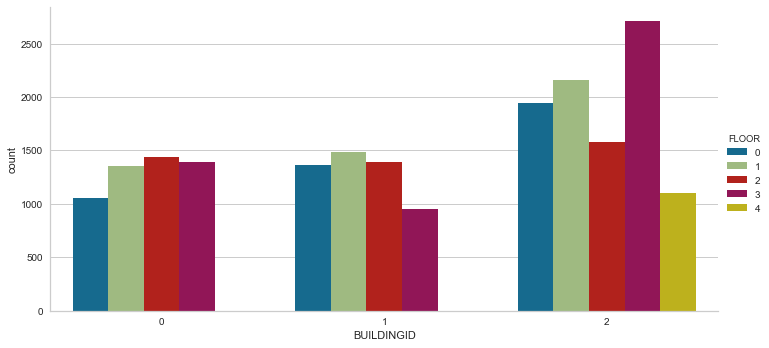

In [319]:
#Lets do a catplot of BUILDING and FLOOR
sns.catplot('BUILDINGID', data=ds_complete, kind='count', hue='FLOOR', order=[0,1,2,], 
               hue_order=[0,1,2,3,4], aspect=2)


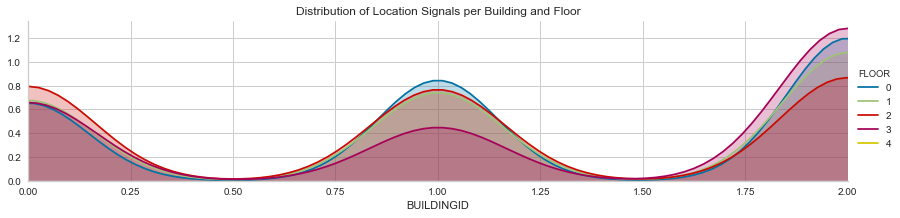

In [320]:
# Signal Distribution by Building and Floor
fig = sns.FacetGrid(ds_complete, hue='FLOOR', aspect=4)
fig.map(sns.kdeplot, 'BUILDINGID', shade=True)
oldest = ds_complete['BUILDINGID'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Location Signals per Building and Floor')
fig.add_legend()

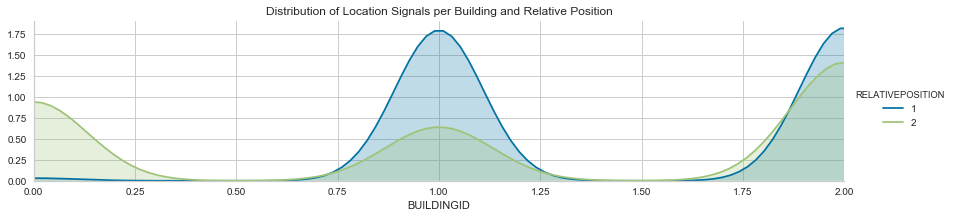

In [321]:
# Signal Distribution by Building and Relative Position
# Relative Position Value 2 means outside the door of the space
# Relative Position Value 1 means inside the door
fig = sns.FacetGrid(ds_complete, hue='RELATIVEPOSITION', aspect=4)
fig.map(sns.kdeplot, 'BUILDINGID', shade=True)
oldest = ds_complete['BUILDINGID'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Location Signals per Building and Relative Position')
fig.add_legend()

In [322]:
# In the above graph we see that many signals were captured in hallways in Building 2.  
# In Building 0 signals were captured inside the doorways of the space.

## Transform Data and Check for Nulls

In [323]:
# sum number of NaNs
num_nans = ds_complete.size - ds_complete.count().sum()
print(num_nans)

0


In [324]:
# check for totals of nulls
# there are none
len(ds_complete) - ds_complete.count()

WAP001              0
WAP002              0
WAP003              0
WAP004              0
WAP005              0
WAP006              0
WAP007              0
WAP008              0
WAP009              0
WAP010              0
WAP011              0
WAP012              0
WAP013              0
WAP014              0
WAP015              0
WAP016              0
WAP017              0
WAP018              0
WAP019              0
WAP020              0
WAP021              0
WAP022              0
WAP023              0
WAP024              0
WAP025              0
WAP026              0
WAP027              0
WAP028              0
WAP029              0
WAP030              0
                   ..
WAP500              0
WAP501              0
WAP502              0
WAP503              0
WAP504              0
WAP505              0
WAP506              0
WAP507              0
WAP508              0
WAP509              0
WAP510              0
WAP511              0
WAP512              0
WAP513              0
WAP514    

# Preprocess

##  Data Selection -- trainingData

### Create the Target Variable

In [325]:
# https://datatofish.com/concatenate-values-python/
# http://allenkunle.me/dplyr-style-data-manipulation-in-python
# Create a new column to hold the concatenatedd values from FLOOR, SPACEID, AND RELATIVEPOSITION
# This will be used for our target.  We will filter on using Building 1
# Create a new DataFrame to hold these changes
ds_compLocID = pd.DataFrame(ds_complete >>   
 mutate(LoID = 
    ds_complete['FLOOR'].map(str) + ds_complete['SPACEID'].map(str) 
        + ds_complete['RELATIVEPOSITION'].map(str) ) >>
          mask(ds_complete.BUILDINGID == 1))
ds_compLocID.head(10)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,LoID
0,100,100,100,100,100,100,100,100,100,100,...,-7541.264300,4.864921e+06,2,1,106,2,2,23,1371713733,21062
1,100,100,100,100,100,100,100,100,100,100,...,-7536.621200,4.864934e+06,2,1,106,2,2,23,1371713691,21062
2,100,100,100,100,100,100,100,-97,100,100,...,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371714095,21032
3,100,100,100,100,100,100,100,100,100,100,...,-7524.570400,4.864934e+06,2,1,102,2,2,23,1371713807,21022
5,100,100,100,100,100,100,100,100,100,100,...,-7533.896200,4.864939e+06,2,1,105,2,2,23,1371713841,21052
6,100,100,100,100,100,100,100,100,100,100,...,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371713883,21032
7,100,100,100,100,100,100,100,100,100,100,...,-7527.451100,4.864929e+06,2,1,101,2,2,23,1371713775,21012
8,100,100,100,100,100,100,100,100,100,100,...,-7559.497300,4.864888e+06,2,1,112,2,2,23,1371714307,21122
9,100,100,100,100,100,100,100,100,100,100,...,-7510.437173,4.864949e+06,2,1,103,1,2,23,1371714128,21031
10,100,100,100,100,100,100,100,-83,100,100,...,-7528.816402,4.864959e+06,2,1,104,1,2,23,1371714200,21041


In [326]:
# shape should reflect only rows with building ID of 1; less the columns with features with zero variance 
# and the new columns that was created
ds_compLocID.shape

(5196, 530)

In [327]:
ds_compLocID.tail(5)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,LoID
19930,100,100,100,100,100,100,100,100,100,100,...,-7516.1984,4.864890e+06,3,1,4,2,18,10,1371710817,342
19932,100,100,100,100,100,100,100,100,100,100,...,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683,312
19934,100,100,100,100,100,100,100,100,100,100,...,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921,3132
19935,100,100,100,100,100,100,100,100,100,100,...,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049,31132
19936,100,100,100,100,100,100,100,100,100,100,...,-7536.1658,4.864898e+06,3,1,112,2,18,10,1371711025,31122


### Filter Unneeded Features

In [328]:
# remove all predictors except WAPs
ds_compLocID=ds_compLocID.drop(['LONGITUDE', 'LATITUDE', 'FLOOR','BUILDINGID','SPACEID',
                               'RELATIVEPOSITION','USERID','PHONEID','TIMESTAMP'], 1)
# Should have 466 columns
ds_compLocID.shape

(5196, 521)

In [329]:
ds_compLocID.head(5)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LoID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,21062
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,21062
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,21032
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,21022
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,21052


In [330]:
ds_compLocID.shape

(5196, 521)

## Preprocessing

### Check for Near Zero Variance (Constant Features)

In [331]:
ds_compLocIDNZV = pd.DataFrame(ds_compLocID)   
ds_compLocIDNZV.shape

(5196, 521)

In [332]:
# sklearn.feature_selection.VarianceThreshold
# Zero is used as a parameter filter for features with zero variance
# example from https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/

# Use the threshold that we used when running with R.  Default is 0
constant_filter = VarianceThreshold(threshold=0.0100316)

In [333]:
# Filter on this threshold
constant_filter.fit(ds_compLocIDNZV)

VarianceThreshold(threshold=0.0100316)

In [334]:
# Check The are the features that are not constant
len(ds_compLocIDNZV.columns[constant_filter.get_support()])

208

In [335]:
# Verify the number of constant features
constant_columns = [column for column in ds_compLocIDNZV.columns  
                    if column not in ds_compLocIDNZV.columns[constant_filter.get_support()]]
print(len(constant_columns)) 

313


In [336]:
for column in constant_columns:  
    print(column)

WAP001
WAP002
WAP003
WAP004
WAP005
WAP007
WAP009
WAP013
WAP014
WAP018
WAP019
WAP020
WAP025
WAP026
WAP031
WAP032
WAP033
WAP034
WAP039
WAP040
WAP041
WAP042
WAP047
WAP048
WAP053
WAP054
WAP057
WAP058
WAP060
WAP061
WAP062
WAP063
WAP064
WAP065
WAP066
WAP067
WAP068
WAP070
WAP071
WAP072
WAP073
WAP074
WAP075
WAP076
WAP079
WAP080
WAP081
WAP087
WAP092
WAP093
WAP094
WAP095
WAP096
WAP097
WAP098
WAP099
WAP100
WAP117
WAP118
WAP128
WAP138
WAP139
WAP152
WAP153
WAP154
WAP157
WAP158
WAP159
WAP160
WAP161
WAP162
WAP163
WAP195
WAP196
WAP197
WAP199
WAP200
WAP201
WAP202
WAP203
WAP204
WAP205
WAP207
WAP210
WAP211
WAP212
WAP213
WAP214
WAP215
WAP216
WAP217
WAP218
WAP219
WAP220
WAP221
WAP224
WAP225
WAP226
WAP227
WAP228
WAP229
WAP230
WAP231
WAP232
WAP233
WAP234
WAP235
WAP236
WAP237
WAP238
WAP239
WAP240
WAP241
WAP242
WAP243
WAP244
WAP245
WAP246
WAP247
WAP249
WAP250
WAP251
WAP252
WAP253
WAP254
WAP264
WAP265
WAP266
WAP267
WAP269
WAP270
WAP271
WAP272
WAP273
WAP275
WAP276
WAP277
WAP279
WAP280
WAP281
WAP283
WAP285
WAP287

In [337]:
# Remove columns with near zero variance from the data frame
ds_compLocIDNZV.drop(labels=constant_columns, axis=1, inplace=True)  


In [338]:
ds_compLocIDNZV.head(5)


,WAP006,WAP008,WAP010,WAP011,WAP012,WAP015,WAP016,WAP017,WAP021,WAP022,...,WAP446,WAP449,WAP454,WAP468,WAP470,WAP478,WAP489,WAP490,WAP503,LoID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,21062
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,21062
2,100,-97,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,21032
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,21022
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,21052


In [339]:
# we should lose 55 columns, originally we had 529 columns
ds_compLocIDNZV.shape

(5196, 208)

In [340]:
# should be umchanged
ds_compLocID.shape

(5196, 521)

In [1178]:
# Save new data frame as csv file
export_csv = ds_compLocIDNZV.to_csv (r'/Users/celestehofer/Desktop/Austin_DS_Program/Assn5_Task4/ds_compLocIDNZV.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

### Check for Quasi-Constant Features

In [341]:
# Played with several values for threshold.  Will not remove any quasi constant features

In [342]:
# Filter on near constant features
qconstant_filter = VarianceThreshold(threshold=0.02) 
qconstant_filter.fit(ds_compLocIDNZV)

VarianceThreshold(threshold=0.02)

In [343]:
# find the number of columns that are quasi-constant
# NOTE: If we had found constant columns, remove them from the data frame before running this code

len(ds_compLocIDNZV.columns[qconstant_filter.get_support()])

208

In [344]:
qconstant_columns = [column for column in ds_compLocIDNZV.columns  
                    if column not in ds_compLocIDNZV.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns)) 

0


In [345]:
# print names of quasi-constant columns
for column in qconstant_columns:  
    print(column)

In [346]:
# There were no additional columns to remove

### RFE 

In [ ]:
# https://www.programcreek.com/python/example/86795/sklearn.feature_selection.RFE
# https://medium.com/@aneesha/recursive-feature-elimination-with-scikit-learn-3a2cbdf23fb7
# Not implemented due to project time constraints.
# Use of this is a future enhancement
# Ran the code below and it had not completed after 10 hours, likely due to the large number of features
# Future implementation includes:
# 1. Creating a new dataframe containing only the important features found by RFE
# 2. Creating new training and testing sets
# 3. Creating new models using top algorithms, non-tuned and tuned

## Create Training and Test, Sampled, Non Standardized Data

In [347]:
#features
featuresClassic = ds_compLocID.iloc[:,0:520]
print('Summary of feature sample')
featuresClassic.head()

Summary of feature sample


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [348]:
#dependent variable
depVarClassic = ds_compLocID['LoID']
depVarClassic.head()

0    21062
1    21062
2    21032
3    21022
5    21052
Name: LoID, dtype: object

In [349]:
#Training Set (Feature Space: X Training)   2600 rows--half of the rows from the BUILDINGID 1 subset
X_trainClassOrig = (featuresClassic[: 2600])
X_trainClassOrig.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [350]:
#Dependent Variable Training Set (y Training) 2600 rows
y_trainClassOrig = depVarClassic[: 2600]
y_trainClassOrig_count = len(y_trainClassOrig.index)
print('The number of observations in the Y training set are:',str(y_trainClassOrig_count))
y_trainClassOrig.head()

The number of observations in the Y training set are: 2600


0    21062
1    21062
2    21032
3    21022
5    21052
Name: LoID, dtype: object

### Cross Validation

In [351]:
# Creates X_testClassi and y_testClassi from above
# y_testClassi is ground truth
X_trainClassOrig, X_testClassOrig, y_trainClassOrig, y_testClassOrig = train_test_split(X_trainClassOrig, y_trainClassOrig)
X_trainClassOrig.shape, X_testClassOrig.shape, y_trainClassOrig.shape, y_testClassOrig.shape, 

((1950, 520), (650, 520), (1950,), (650,))

## Create Training and Test, Sampled,  Zero Variance Non Standardized Data

In [352]:
#features
featuresClassi = ds_compLocIDNZV.iloc[:,0:207]
print('Summary of feature sample')
featuresClassi.head()

Summary of feature sample


,WAP006,WAP008,WAP010,WAP011,WAP012,WAP015,WAP016,WAP017,WAP021,WAP022,...,WAP439,WAP446,WAP449,WAP454,WAP468,WAP470,WAP478,WAP489,WAP490,WAP503
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,-97,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [353]:
#dependent variable
depVarClassi = ds_compLocIDNZV['LoID']
depVarClassi.head()

0    21062
1    21062
2    21032
3    21022
5    21052
Name: LoID, dtype: object

In [354]:
#Training Set (Feature Space: X Training)   2600 rows--half of the rows from the BUILDINGID 1 subset
X_trainClassi = (featuresClassi[: 2600])
X_trainClassi.head()

,WAP006,WAP008,WAP010,WAP011,WAP012,WAP015,WAP016,WAP017,WAP021,WAP022,...,WAP439,WAP446,WAP449,WAP454,WAP468,WAP470,WAP478,WAP489,WAP490,WAP503
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,-97,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [355]:
#Dependent Variable Training Set (y Training) 2600 rows
y_trainClassi = depVarClassi[: 2600]
y_trainClassi_count = len(y_trainClassi.index)
print('The number of observations in the Y training set are:',str(y_trainClassi_count))
y_trainClassi.head()

The number of observations in the Y training set are: 2600


0    21062
1    21062
2    21032
3    21022
5    21052
Name: LoID, dtype: object

### Cross Validation

In [356]:
# Creates X_testClassi and y_testClassi from above
# y_testClassi is ground truth
X_trainClassi, X_testClassi, y_trainClassi, y_testClassi = train_test_split(X_trainClassi, y_trainClassi)
X_trainClassi.shape, X_testClassi.shape, y_trainClassi.shape, y_testClassi.shape, 

((1950, 207), (650, 207), (1950,), (650,))

In [357]:
y_trainClassi.head()

35        292
3815    02482
4271    02352
4427    12062
5171    32022
Name: LoID, dtype: object

In [358]:
y_testClassi.head(15)

3301    02352
11      21042
1475      242
4135    12102
5668    22172
6209    22012
3723    12102
4396    02272
4146    12031
4842    31011
1522      272
700     22172
6103    22062
1409      271
5097    31031
Name: LoID, dtype: object

#  Example: Serialize Model , Delete Model, and Restore Model using Pickle

# Selecting Data

## Examine Scaled Data Values

In [1033]:
X_scaled = preprocessing.scale(X_trainClassi)
X_scaled

array([[0.34418886, 0.16048089, 0.13316843, ..., 0.07868895, 0.06808693,
        0.37610276],
       [0.34418886, 0.16048089, 0.13316843, ..., 0.07868895, 0.06808693,
        0.37610276],
       [0.34418886, 0.16048089, 0.13316843, ..., 0.07868895, 0.06808693,
        0.37610276],
       ...,
       [0.34418886, 0.16048089, 0.13316843, ..., 0.07868895, 0.06808693,
        0.37610276],
       [0.34418886, 0.16048089, 0.13316843, ..., 0.07868895, 0.06808693,
        0.37610276],
       [0.34418886, 0.16048089, 0.13316843, ..., 0.07868895, 0.06808693,
        0.37610276]])

In [1034]:
# Check for mean of scaled training set
X_scaled.mean(axis=0)

array([-2.18628534e-17,  2.18628534e-17,  2.53244719e-16,  1.87656158e-16,
        2.91504712e-17, -1.09314267e-17,  1.09314267e-17, -1.28626454e-15,
       -2.45046149e-16,  8.38076047e-17, -3.47983750e-16,  0.00000000e+00,
       -8.01637958e-16,  4.95558011e-16,  5.65701332e-16,  3.94442314e-16,
       -1.91299967e-17,  2.67819954e-16, -9.83828403e-17,  7.28761780e-17,
        0.00000000e+00,  0.00000000e+00,  2.91504712e-17, -1.67615209e-16,
       -6.19447513e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.60532336e-16, -6.14892752e-17,  4.99201819e-16,  1.06034839e-15,
        2.63265193e-16,  3.93531361e-16,  1.82190445e-16,  7.28761780e-18,
        1.16601885e-16,  5.46571335e-18,  3.30675658e-16,  3.64380890e-18,
       -8.74514136e-17, -1.73080923e-17, -1.02937601e-16, -3.41607085e-17,
       -1.63971401e-16, -4.78249918e-17, -1.02026649e-16,  1.10225219e-16,
        7.44703444e-17, -9.10952225e-18,  2.55066623e-17, -7.10542736e-17,
       -1.18423789e-17, -

## Rescale Data

### MinMaxScaler Approach to Scaling Data, sensitive to outliers

In [1035]:
# Not used in this project

### StandardiScaler Approach to Scaling Data 

In [360]:
# https://stackoverflow.com/questions/38420847/apply-standardscaler-on-a-partial-part-of-a-data-set
# https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

In [361]:
# make a copy of the dataframe
# grab all columns except the last, the target, as that is not dtype int64
ds_compLocIDSTD = pd.DataFrame(ds_compLocID) 
ds_compLocIDSTD = ds_compLocIDSTD.drop(['LoID'], 1)
ds_compLocIDSTD.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [362]:
# only transform the columns with dtype of int64

col_names = ds_compLocIDSTD.columns
col_names

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP511', 'WAP512', 'WAP513', 'WAP514', 'WAP515', 'WAP516', 'WAP517',
       'WAP518', 'WAP519', 'WAP520'],
      dtype='object', length=520)

In [363]:

# https://stackoverflow.com/questions/38420847/apply-standardscaler-on-a-partial-part-of-a-data-set
featuresMost = ds_compLocIDSTD[col_names]
scalerSS = StandardScaler().fit(featuresMost.values)
featuresMost = scalerSS.transform(featuresMost.values)

In [364]:
ds_compLocIDSTD[col_names] = featuresMost
ds_compLocIDSTD.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,-3.175882,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [365]:
# add target LoID to this new data frame
ds_compLocIDSTD['LoID'] = pd.Series(ds_compLocID['LoID'])
ds_compLocIDSTD.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LoID
0,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21062
1,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21062
2,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,-3.175882,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21032
3,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21022
5,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21052


In [366]:
# Save new data frame as csv file
export_csv = ds_compLocIDSTD.to_csv (r'/Users/celestehofer/Desktop/Austin_DS_Program/Assn5_Task4/ds_compLocIDSTD.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

### Normalization

In [367]:
# Normalization is not needed as all of the inputs are on the same scale.  They are all WAP measurements.

## Create Training and Test Sets Standardized Data

In [369]:
#features
featuresClassiSTD = ds_compLocIDSTD.iloc[:,0:465]
print('Summary of feature sample')
featuresClassiSTD.head()

Summary of feature sample


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP456,WAP457,WAP458,WAP459,WAP460,WAP461,WAP462,WAP463,WAP464,WAP465
0,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,-3.175882,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [370]:
#dependent variable
depVarClassiSTD = ds_compLocIDSTD['LoID']
depVarClassiSTD.head()

0    21062
1    21062
2    21032
3    21022
5    21052
Name: LoID, dtype: object

In [371]:
#Training Set (Feature Space: X Training)   2600 rows
X_trainClassiSTD = (featuresClassiSTD[: 2600])
X_trainClassiSTD.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP456,WAP457,WAP458,WAP459,WAP460,WAP461,WAP462,WAP463,WAP464,WAP465
0,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,-3.175882,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [372]:
#Dependent Variable Training Set (y Training) 2600 rows
y_trainClassiSTD = depVarClassiSTD[: 2600]
y_trainClassiSTD_count = len(y_trainClassiSTD.index)
print('The number of observations in the Y training set are:',str(y_trainClassiSTD_count))
y_trainClassiSTD.head()

The number of observations in the Y training set are: 2600


0    21062
1    21062
2    21032
3    21022
5    21052
Name: LoID, dtype: object

## Cross Validation

In [373]:
# this will create the X_testClassi and y_testClassi from above
X_trainClassiSTD, X_testClassiSTD, y_trainClassiSTD, y_testClassiSTD = train_test_split(X_trainClassiSTD, y_trainClassiSTD)
X_trainClassiSTD.shape, X_testClassiSTD.shape, y_trainClassiSTD.shape, y_testClassiSTD.shape

((1950, 465), (650, 465), (1950,), (650,))

# Feature Engineering

In [374]:
# Use PCA
# https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe

### PCA

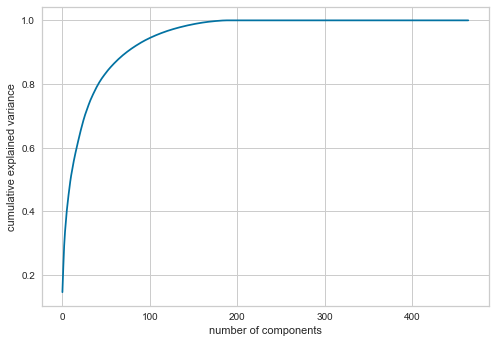

In [578]:
# Choosing the # of components
pca = PCA().fit(X_trainClassiSTD)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [377]:
# From the graph, we will choose 100 components 

In [580]:
# https://stackoverflow.com/questions/22984335/recovering-features-names-of-
#explained-variance-ratio-in-pca-with-sklearn
# From the url above:  PCA, as I understand it, identifies the features 
#with the greatest variance in a dataset, 
# and can then use this quality of the dataset to create a smaller dataset with a minimal 
# loss of descriptive power. The advantages of a smaller dataset is that it requires less 
# processing power and should have less noise in the data. But the features of greatest variance 
# are not the "best" or "most important" features of a dataset, 
# insofar as such concepts can be said to exist at all.
pca=PCA(n_components=100)  
X_trainClassiPCA = pca.fit_transform(X_trainClassiSTD)
print(pca.explained_variance_ratio_)


[0.14615043 0.07798029 0.06793138 0.04449539 0.03341178 0.03191482
 0.02562614 0.02377005 0.02190757 0.02121913 0.01819015 0.01580453
 0.01517329 0.01462184 0.01368434 0.01258231 0.01239655 0.01195486
 0.01178861 0.01169327 0.01136006 0.0111415  0.01058306 0.01036746
 0.01000779 0.00950748 0.00859021 0.00799864 0.00795554 0.00777379
 0.00732556 0.00723593 0.00696794 0.00632267 0.00603724 0.00597781
 0.00577621 0.00572942 0.00547044 0.00533027 0.00516858 0.00492248
 0.00467154 0.00450396 0.00434712 0.00411063 0.00392806 0.00374645
 0.00373743 0.0036849  0.0035727  0.0035084  0.00346239 0.00331846
 0.00316918 0.0031085  0.00306801 0.00300116 0.0028822  0.00284437
 0.00276348 0.00275687 0.00271024 0.00269468 0.00260722 0.00252927
 0.00247646 0.00243745 0.00239226 0.00236414 0.00228069 0.00221906
 0.00220115 0.00213287 0.0021145  0.00208122 0.00207326 0.00200086
 0.00194491 0.00190138 0.00189223 0.00185776 0.00179716 0.00177729
 0.00175715 0.00171743 0.00170812 0.00167805 0.00165373 0.0016

In [581]:
# Should only see 10 features or columns
print(X_trainClassiPCA.shape)

(1950, 100)


In [582]:
# Should only see 10 features or columns
X_testClassiPCA = pca.transform(X_testClassiSTD)
print(X_testClassiPCA.shape)

(650, 100)


## Covariance and Correlation Matrixes 

In [368]:
# Computed 3 matrices:
# Covariance matrix on standardized data
# Correlation matrix on standardized data
# Correlation matrix on unstandardized data

In [1122]:
# covariance matrix on standardized data
mean_vec = np.mean(ds_compLocIDSTD, axis=0)
mean_vec
#val = pd.to_numeric(creditExtraColsEdSTD) - pd.to_numeric(mean_vec)
#cov_matrix = (creditExtraColsEdSTD - mean_vec).T.dot((creditExtraColsEdSTD - mean_vec)) / (creditExtraColsEdSTD.shape[0]-1)
#print('Covariance matrix \n%s' %cov_matrix)

WAP001    0.000000e+00
WAP002    0.000000e+00
WAP003    0.000000e+00
WAP004    0.000000e+00
WAP005    0.000000e+00
WAP006   -1.229872e-14
WAP007    0.000000e+00
WAP008    5.621412e-16
WAP009    0.000000e+00
WAP010   -8.847170e-16
WAP011   -4.159106e-15
WAP012   -3.822460e-15
WAP013    0.000000e+00
WAP014    0.000000e+00
WAP015   -3.826552e-15
WAP016   -6.629469e-15
WAP017   -3.279549e-16
WAP018    0.000000e+00
WAP019    0.000000e+00
WAP020    0.000000e+00
WAP021   -1.014441e-15
WAP022    2.222390e-15
WAP023    3.325931e-15
WAP024    4.298754e-15
WAP025    0.000000e+00
WAP026    0.000000e+00
WAP027    4.870895e-15
WAP028   -1.207277e-15
WAP029   -1.168453e-15
WAP030    5.760137e-16
              ...     
WAP492    0.000000e+00
WAP493    0.000000e+00
WAP494    0.000000e+00
WAP495    0.000000e+00
WAP496    0.000000e+00
WAP497    0.000000e+00
WAP498    0.000000e+00
WAP499    0.000000e+00
WAP500    0.000000e+00
WAP501    0.000000e+00
WAP502    0.000000e+00
WAP503    1.405962e-15
WAP504    0

In [1123]:
print("Shape of array:\n", np.shape(ds_compLocIDSTD)) 

Shape of array:
 (5196, 521)


In [1124]:
# Using ds_compLocIDSTD or ds_compLocID gives an error so using 
# the original data where the data types are the same--int 64
print("Covarinace matrix of data complete:\n", np.cov(ds_complete)) 


Covarinace matrix of data complete:
 [[3.55689365e+15 3.55689354e+15 3.55689458e+15 ... 3.55688634e+15
  3.55688669e+15 3.55688662e+15]
 [3.55689354e+15 3.55689343e+15 3.55689447e+15 ... 3.55688624e+15
  3.55688658e+15 3.55688651e+15]
 [3.55689458e+15 3.55689447e+15 3.55689552e+15 ... 3.55688728e+15
  3.55688762e+15 3.55688756e+15]
 ...
 [3.55688634e+15 3.55688624e+15 3.55688728e+15 ... 3.55687904e+15
  3.55687938e+15 3.55687932e+15]
 [3.55688669e+15 3.55688658e+15 3.55688762e+15 ... 3.55687938e+15
  3.55687973e+15 3.55687966e+15]
 [3.55688662e+15 3.55688651e+15 3.55688756e+15 ... 3.55687932e+15
  3.55687966e+15 3.55687960e+15]]


In [1125]:

# correlation matrix on standardized data:
#cor_matrix = np.corrcoef(creditExtraColsEdSTD.T)
cor_matrixSTD = ds_compLocIDSTD.corr().abs()
cor_matrixSTD
#print('Correlation matrix using standardized data\n%s' %cor_matrix)

## Renders many NaN, for values that are 0.0

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
WAP001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP006,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.082381,NaN,0.031102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP008,NaN,NaN,NaN,NaN,NaN,0.082381,NaN,1.000000,NaN,0.045087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP010,NaN,NaN,NaN,NaN,NaN,0.031102,NaN,0.045087,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1126]:
# correlation matrix on unstandardized data:
cor_matrix = ds_compLocID.corr().abs()
cor_matrix
# Also render NaN for values of 0.0

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
WAP001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP006,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.082381,NaN,0.031102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP008,NaN,NaN,NaN,NaN,NaN,0.082381,NaN,1.000000,NaN,0.045087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAP010,NaN,NaN,NaN,NaN,NaN,0.031102,NaN,0.045087,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Classification Spot Check Models 

In [ ]:
# Based on the results below, these models will be investigated further:
# KNeighborsClassifier
# MLPClassifier
# DecisionTreeClassifier
# GaussianNB
# RandomForestClassifier
# SGDClassifier
# AdaBoostClassifier

### Original data, variance removed not standardized

In [384]:
# Test options and evaluation metric 
num_folds=10 
seed=7 
scoring= 'accuracy'

#Spot-CheckAlgorithms 
models=[] # pcannet  bayesglm  nnet C5.0  
models.append(('KNN',KNeighborsClassifier()))  ##
models.append(('NNET',MLPClassifier(alpha=1, max_iter=1000)))
models.append(('CART',DecisionTreeClassifier())) ##
models.append(('NB',GaussianNB())) #
models.append(('RF',RandomForestClassifier())) ##
models.append(('SGD',SGDClassifier()))
models.append(('AB',AdaBoostClassifier())) 
# Often used for dimensionality reduction will not use
# models.append(('LDA',LinearDiscriminantAnalysis())) 

#models.append(('SVM',SVC(kernel="rbf", C=0.025, probability=True)))
#models.append(('NuSVC',NuSVC(probability=True)))
#models.append(('GB',GradientBoostingClassifier()))  NO
#models.append(('QDA',QuadraticDiscriminantAnalysis()))  NO

results=[] 
names=[] 
for name, model in models:
   

   kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)
# also want to use kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=seed)
   cv_results=cross_val_score(model,X_trainClassi,y_trainClassi,cv=kfold,scoring=scoring) 
   results.append(cv_results) 
   names.append(name)
   msg="%s:%f(%f)"%( name,cv_results.mean(),cv_results.std()) 
   print("Mean and standard deviation of accuracy measure: ", msg)

Mean and standard deviation of accuracy measure:  KNN:0.609282(0.030971)
Mean and standard deviation of accuracy measure:  NNET:0.586051(0.035508)
Mean and standard deviation of accuracy measure:  CART:0.668051(0.033728)
Mean and standard deviation of accuracy measure:  NB:0.630154(0.031698)
Mean and standard deviation of accuracy measure:  RF:0.780308(0.032423)
Mean and standard deviation of accuracy measure:  SGD:0.438154(0.042625)
Mean and standard deviation of accuracy measure:  AB:0.041590(0.016036)
Mean and standard deviation of accuracy measure:  LDA:0.596923(0.036994)


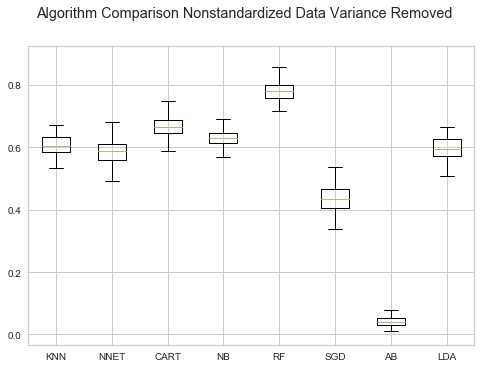

In [386]:
#Compare Algorithms Using Box and Whisker Plots
# Compare accuracy across cross-validation fields
fig=plt.figure() 
fig.suptitle("Algorithm Comparison Nonstandardized Data Variance Removed") 
ax=fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

### Original data, not standardized

In [392]:
# Test options and evaluation metric 
num_folds=10 
seed=7 
scoring= 'accuracy'

#Spot-CheckAlgorithms 
models=[] # pcannet  bayesglm  nnet C5.0  
models.append(('KNN',KNeighborsClassifier()))  ##
models.append(('NNET',MLPClassifier(alpha=1, max_iter=1000)))
models.append(('CART',DecisionTreeClassifier())) ##
models.append(('NB',GaussianNB())) #
models.append(('RF',RandomForestClassifier())) ##
models.append(('SGD',SGDClassifier()))
models.append(('AB',AdaBoostClassifier())) 
## Often used for dimensionality reduction will not use
# models.append(('LDA',LinearDiscriminantAnalysis())) 

#models.append(('SVM',SVC(kernel="rbf", C=0.025, probability=True)))
#models.append(('NuSVC',NuSVC(probability=True)))
#models.append(('GB',GradientBoostingClassifier()))  NO
#models.append(('QDA',QuadraticDiscriminantAnalysis()))  NO

results=[] 
names=[] 
for name, model in models:

   kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)
# also want to use kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=seed)
   cv_resultsO=cross_val_score(model,X_trainClassOrig,y_trainClassOrig,cv=kfold,scoring=scoring) 
   results.append(cv_resultsO) 
   names.append(name)
   msg="%s:%f(%f)"%( name,cv_resultsO.mean(),cv_resultsO.std()) 
   print("Mean and standard deviation of accuracy measure: ", msg)



Mean and standard deviation of accuracy measure:  KNN:0.598872(0.035266)
Mean and standard deviation of accuracy measure:  NNET:0.297282(0.148839)
Mean and standard deviation of accuracy measure:  CART:0.643487(0.029977)
Mean and standard deviation of accuracy measure:  NB:0.636872(0.034238)
Mean and standard deviation of accuracy measure:  RF:0.771590(0.028008)
Mean and standard deviation of accuracy measure:  SGD:0.309231(0.048453)
Mean and standard deviation of accuracy measure:  AB:0.040051(0.014554)
Mean and standard deviation of accuracy measure:  LDA:0.596000(0.034497)


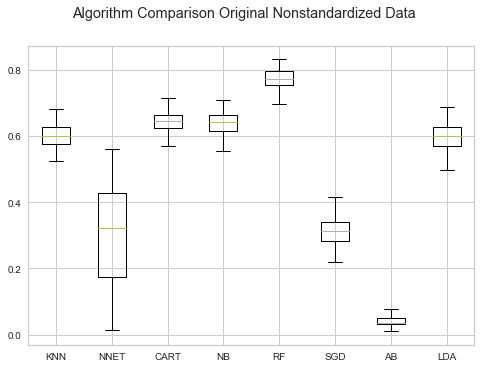

In [393]:
#Compare Algorithms Using Box and Whisker Plots
# Compare accuracy across cross-validation fields
fig=plt.figure() 
fig.suptitle("Algorithm Comparison Original Nonstandardized Data") 
ax=fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

### Standardized Data  

In [385]:
# Test options and evaluation metric 
num_folds=10 
seed=7 
scoring= 'accuracy'

#Spot-CheckAlgorithms 
models=[] 
models.append(('KNN',KNeighborsClassifier()))
models.append(('NNET',MLPClassifier(alpha=1, max_iter=1000)))
models.append(('CART',DecisionTreeClassifier())) 
models.append(('NB',GaussianNB())) 
models.append(('RF',RandomForestClassifier()))
models.append(('SGD',SGDClassifier()))
models.append(('AB',AdaBoostClassifier())) 
## Often used for dimensionality reduction will not use
# models.append(('LDA',LinearDiscriminantAnalysis())) 

#models.append(('SVM',SVC(gamma='auto'))) NO
#models.append(('GB',GradientBoostingClassifier()))  NO
#models.append(('QDA',QuadraticDiscriminantAnalysis()))  NO



resultsSTD=[] 
names=[] 
for name, model in models:
   kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)
# also want to use kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=seed)
   cv_resultsSTD=cross_val_score(model,X_trainClassiSTD,y_trainClassiSTD,cv=kfold,scoring=scoring) 
   resultsSTD.append(cv_resultsSTD) 
   names.append(name)
   msg="%s:%f(%f)"%( name,cv_resultsSTD.mean(),cv_resultsSTD.std()) 
   print("Mean and standard deviation of accuracy measure: ", msg)

Mean and standard deviation of accuracy measure:  KNN:0.574564(0.031302)
Mean and standard deviation of accuracy measure:  NNET:0.691846(0.034002)
Mean and standard deviation of accuracy measure:  CART:0.649846(0.034653)
Mean and standard deviation of accuracy measure:  NB:0.626513(0.032523)
Mean and standard deviation of accuracy measure:  RF:0.770154(0.029040)
Mean and standard deviation of accuracy measure:  SGD:0.589590(0.033935)
Mean and standard deviation of accuracy measure:  AB:0.034000(0.012041)
Mean and standard deviation of accuracy measure:  LDA:0.022205(0.027426)


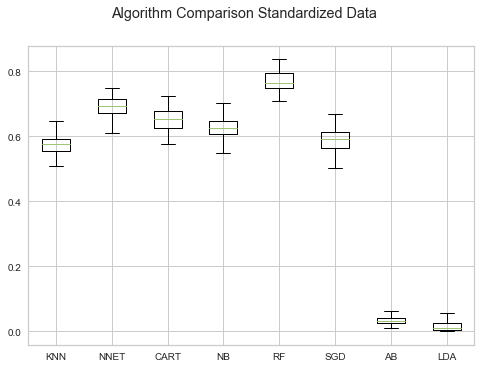

In [387]:
#Compare Algorithms Using Box and Whisker Plots
# Compare accuracy across cross-validation fields
fig=plt.figure() 
fig.suptitle("Algorithm Comparison Standardized Data") 
ax=fig.add_subplot(111) 
plt.boxplot(resultsSTD) 
ax.set_xticklabels(names) 
plt.show()

# Classification--Model Building

## Models (non-tuned) -- Original Non-Standardized Data

### Random Forest

In [455]:
# Run initially with defaults. 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
num_trees=100 ` 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 
modelRF=RandomForestClassifier()
#modelRF=RandomForestClassifier(n_estimators=num_trees,max_features=max_features) 
#modelRF=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)  ## results better with no params
results=cross_val_score(modelRF,X_trainClassOrig,y_trainClassOrig,cv=kfold) 
print(results.mean())

0.7658461538461537


In [913]:
modelRF = modelRF.fit(X_trainClassOrig,y_trainClassOrig)
modelRF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [457]:
# more results from loaded model
print('The RF scores per cv split, score array, train, test: ', 
      cross_val_score(modelRF, X_trainClassOrig, y_trainClassOrig)) 

The RF scores per cv split, score array, train, test:  [0.70545977 0.76840491 0.75747508]


In [914]:
# Make predictions using the test set
target_predRF = modelRF.predict(X_testClassOrig)

In [915]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassOrig, target_predRF, normalize = True)


0.8769230769230769

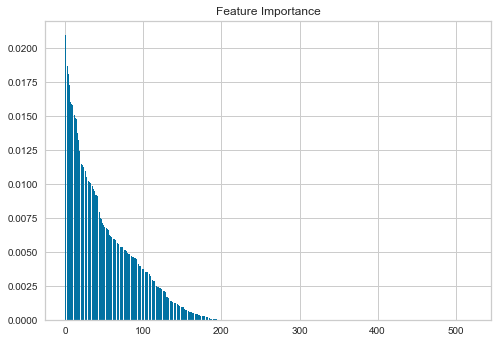

In [1131]:
# https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/
# feature importance
importances = modelRF.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [ds_compLocID.columns[i] for i in indices < 15]
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_trainClassOrig.shape[1]), importances[indices])

# Add feature names as x-axis labels
#plt.xticks(range(X_trainClassOrig.shape[1]), names, rotation=90)

# Show plot
plt.show()

## not very helpful graph

In [908]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelRFnon.sav'

In [909]:
# save model LR using pickle to .sav file
pickle.dump(modelRF, open(filename, 'wb'))

### Neural Network

In [462]:
seed=7 
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 

modelNNET=MLPClassifier(alpha=1, max_iter=1000)
results=cross_val_score(modelNNET,X_trainClassOrig,y_trainClassOrig,cv=kfold) 
print(results.mean())

0.3111794871794871


In [463]:
modelNNET = modelNNET.fit(X_trainClassOrig,y_trainClassOrig)
modelNNET

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [464]:
# R-squared is the default metric used by Sklearn.
result = modelNNET.score(X_testClassOrig, y_testClassOrig)
print(result)

0.45692307692307693


In [465]:
# more results from loaded model
print('The NNET scores per cv split, score array, train, test: ', 
      cross_val_score(modelNNET, X_trainClassOrig, y_trainClassOrig)) 

The NNET scores per cv split, score array, train, test:  [0.42097701 0.35889571 0.07973422]


In [466]:
# Make predictions using the test set
target_predNNET = modelNNET.predict(X_testClassOrig)

In [1086]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassOrig, target_predNNET, normalize = True)


0.45692307692307693

In [ ]:
# feature importance
# NNET does not have feature importance

In [ ]:
# save model 

In [ ]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNNETnon.sav'

In [ ]:
# save model LR using pickle to .sav file
pickle.dump(modelNNET, open(filename, 'wb'))

### KNN K-Nearest Neighbor

In [1090]:
# https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
seed=7
#kfold=KFold(n_splits=10,random_state=seed) 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 
modelKNN=KNeighborsClassifier(n_neighbors=10) 
results=cross_val_score(modelKNN,X_trainClassOrig,y_trainClassOrig,cv=kfold) 
print(results.mean())

0.5425641025641026


In [1091]:
modelKNN = modelKNN.fit(X_trainClassOrig,y_trainClassOrig)
modelKNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [469]:
# more results from loaded model
print('The KNN scores per cv split, score array, train, test: ', 
      cross_val_score(modelKNN, X_trainClassOrig, y_trainClassOrig)) 

The KNN scores per cv split, score array, train, test:  [0.52011494 0.55521472 0.51827243]


In [1092]:
# Make predictions using the test set
target_predKNN = modelKNN.predict(X_testClassOrig)

In [1093]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassOrig, target_predKNN, normalize = True)


0.6030769230769231

In [472]:
# save model 

In [473]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelKNNnon.sav'

In [474]:
# save model LR using pickle to .sav file
pickle.dump(modelKNN, open(filename, 'wb'))

### Naive Bayes 

In [475]:
seed=7
#kfold=KFold(n_splits=10,random_state=seed) 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 
modelNB=GaussianNB() 
results=cross_val_score(modelNB,X_trainClassOrig,y_trainClassOrig,cv=kfold) 
print(results.mean())

0.6374871794871794


In [476]:
modelNB = modelNB.fit(X_trainClassOrig,y_trainClassOrig)
modelNB

GaussianNB(priors=None, var_smoothing=1e-09)

In [477]:
# more results from loaded model
print('The NB scores per cv split, score array, train, test: ', 
      cross_val_score(modelNB, X_trainClassOrig, y_trainClassOrig)) 

The NB scores per cv split, score array, train, test:  [0.58908046 0.64263804 0.63621262]


In [478]:
# Make predictions using the test set
target_predNB = modelNB.predict(X_testClassOrig)

In [479]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassOrig, target_predNB, normalize = True)


0.66

In [480]:
# save model . and look at regression steps

In [481]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNBnon.sav'

In [482]:
# save model LR using pickle to .sav file
pickle.dump(modelNB, open(filename, 'wb'))

### CART 

In [483]:

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# seed=7
# kfold=KFold(n_splits=10,random_state=seed)

kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 
modelCART=DecisionTreeClassifier() 
results=cross_val_score(modelCART,X_trainClassOrig,y_trainClassOrig,cv=kfold) 
print(results.mean())

0.6473333333333333


In [484]:
modelCART = modelCART.fit(X_trainClassOrig,y_trainClassOrig)
modelCART

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [485]:
# more results from loaded model
print('The CART scores per cv split, score array, train, test: ', 
      cross_val_score(modelCART, X_trainClassOrig, y_trainClassOrig)) 

The CART scores per cv split, score array, train, test:  [0.63649425 0.64570552 0.65282392]


In [486]:
# Make predictions using the test set
target_predCART = modelCART.predict(X_testClassOrig)

In [487]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassOrig, target_predCART, normalize = True)


0.6984615384615385

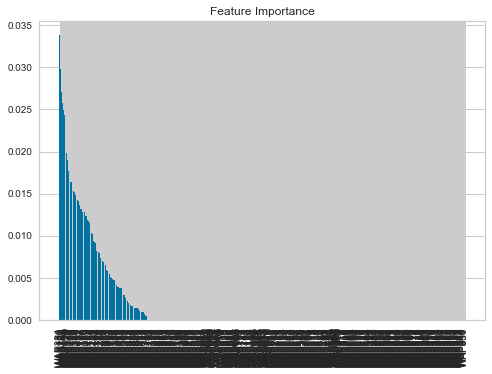

In [1133]:
# feature importance
importances = modelCART.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [ds_compLocID.columns[i] for i in indices]
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_trainClassOrig.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_trainClassOrig.shape[1]), names, rotation=90)

# Show plot
plt.show()
# Difficult to tell which features are most important from the graph as many are rendered

In [ ]:
# save model 

In [488]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelCARTnon.sav'

In [489]:
# save model LR using pickle to .sav file
pickle.dump(modelCART, open(filename, 'wb'))

### Stochastic Gradient Descent

In [490]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# https://medium.com/@hakobavjyan/stochastic-gradient-descent-sgd-10ce70fea389 
# https://datascience.stackexchange.com/questions/6676/scikit-learn-getting-sgdclassifier-to-predict-as-well-as-a-logistic-regression
# seed=7
# kfold=KFold(n_splits=10,random_state=seed)
alpha= [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 
modelSGD=SGDClassifier(loss="log", penalty="l2", max_iter=5) 
results=cross_val_score(modelSGD,X_trainClassOrig,y_trainClassOrig,cv=kfold) 
print(results.mean())

0.2799487179487179


In [491]:
modelSGD = modelSGD.fit(X_trainClassOrig,y_trainClassOrig)
modelSGD

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [492]:
# more results from loaded model
print('The SGD scores per cv split, score array, train, test: ', 
      cross_val_score(modelSGD, X_trainClassOrig, y_trainClassOrig)) 

The SGD scores per cv split, score array, train, test:  [0.27011494 0.28527607 0.2923588 ]


In [493]:
# Make predictions using the test set
target_predSGD = modelSGD.predict(X_testClassOrig)

In [494]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassOrig, target_predSGD, normalize = True)


0.3292307692307692

In [1132]:
# SGDClassifier does not have feature importance

In [ ]:
# save model 

In [495]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelSGDnon.sav'

In [496]:
# save model LR using pickle to .sav file
pickle.dump(modelSGD, open(filename, 'wb'))

## Models (non-tuned) Built Non-Standardized Data Zero Variance Removed

### Random Forest Zero Variance Removed

In [409]:
# Run initially with defaults.  
num_trees=100 
max_features=3 
#kfold=KFold(n_splits=10,random_state=7) 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)
modelRF_NZV=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)  
#modelRF=RandomForestClassifier()
results=cross_val_score(modelRF_NZV,X_trainClassi,y_trainClassi,cv=kfold) 
print(results.mean())

0.8532307692307692


In [410]:
modelRF_NZV = modelRF_NZV.fit(X_trainClassi,y_trainClassi)
modelRF_NZV

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [411]:
# more results from loaded model
print('The RF_NZV scores per cv split, score array, train, test: ', 
      cross_val_score(modelRF_NZV, X_trainClassi, y_trainClassi)) 

The RF_NZV scores per cv split, score array, train, test:  [0.83569405 0.86728395 0.87248322]


In [412]:
# Make predictions using the test set
target_predRF_NZV = modelRF_NZV.predict(X_testClassi)

In [413]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predRF_NZV, normalize = True)


0.8584615384615385

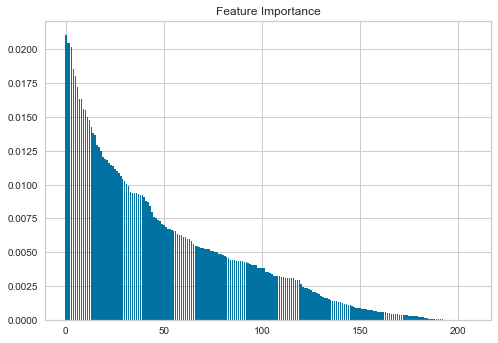

In [1135]:
# https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/
# feature importance
importances = modelRF_NZV.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [ds_compLocIDNZV.columns[i] for i in indices < 15]
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_trainClassi.shape[1]), importances[indices])

# Add feature names as x-axis labels
#plt.xticks(range(X_trainClassi.shape[1]), names, rotation=90)

# Show plot
plt.show()
# not very helpful 

In [414]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelRF_NZV.sav'

In [415]:
# save model LR using pickle to .sav file
pickle.dump(modelRF_NZV, open(filename, 'wb'))

### Neural Network Zero Variance Removed

In [417]:
#seed=7 
#kfold=KFold(n_splits=10,random_state=seed) 

kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 

modelNNET_NZV=MLPClassifier(alpha=1, max_iter=1000)
results=cross_val_score(modelNNET_NZV,X_trainClassi,y_trainClassi,cv=kfold) 
print(results.mean())

0.5928205128205127


In [418]:
modelNNET_NZV = modelNNET_NZV.fit(X_trainClassi,y_trainClassi)
modelNNET_NZV

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [419]:
# more results from loaded model
print('The NNET_NZV scores per cv split, score array, train, test: ', 
      cross_val_score(modelNNET_NZV, X_trainClassi, y_trainClassi)) 

The NNET_NZV scores per cv split, score array, train, test:  [0.55524079 0.57098765 0.58053691]


In [420]:
# Make predictions using the test set
target_predNNET_NZV = modelNNET_NZV.predict(X_testClassi)

In [421]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predNNET_NZV, normalize = True)


0.6

In [ ]:
# save model 

In [422]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNNET_NZV.sav'

In [423]:
# save model LR using pickle to .sav file
pickle.dump(modelNNET_NZV, open(filename, 'wb'))

### KNN K-Nearest Neighbor Zero Variance Removed

In [922]:
seed=7
#kfold=KFold(n_splits=10,random_state=seed) 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 
modelKNN_NZV=KNeighborsClassifier(n_neighbors=10) 


In [923]:
modelKNN = modelKNN_NZV.fit(X_trainClassi,y_trainClassi)
modelKNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [426]:
# more results from loaded model
print('The KNN_NZV scores per cv split, score array, train, test: ', 
      cross_val_score(modelKNN_NZV, X_trainClassi, y_trainClassi)) 

The KNN_NZV scores per cv split, score array, train, test:  [0.50991501 0.54012346 0.54194631]


In [924]:
# Make predictions using the test set
target_predKNN_NZV = modelKNN_NZV.predict(X_testClassi)

In [925]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predKNN_NZV, normalize = True)


0.5769230769230769

In [926]:
# save model 

In [927]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelKNN_NZV.sav'

In [928]:
# save model LR using pickle to .sav file
pickle.dump(modelKNN_NZV, open(filename, 'wb'))

### Naive Bayes Zero Variance Removed

In [432]:
seed=7
#kfold=KFold(n_splits=10,random_state=seed) 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 
modelNB_NZV=GaussianNB() 
results=cross_val_score(modelNB_NZV,X_trainClassi,y_trainClassi,cv=kfold) 
print(results.mean())

0.6276923076923077


In [433]:
modelNB_NZV = modelNB_NZV.fit(X_trainClassi,y_trainClassi)
modelNB_NZV

GaussianNB(priors=None, var_smoothing=1e-09)

In [434]:
# more results from loaded model
print('The NB_NZV scores per cv split, score array, train, test: ', 
      cross_val_score(modelNB_NZV, X_trainClassi, y_trainClassi)) 

The NB_NZV scores per cv split, score array, train, test:  [0.59490085 0.62037037 0.65604027]


In [435]:
# Make predictions using the test set
target_predNB_NZV = modelNB_NZV.predict(X_testClassi)

In [436]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predNB_NZV, normalize = True)


0.6415384615384615

In [437]:
# save model . and look at regression steps

In [438]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNB_NZV.sav'

In [439]:
# save model LR using pickle to .sav file
pickle.dump(modelNB_NZV, open(filename, 'wb'))

### CART Zero Variance Removed

In [440]:
seed=7
# kfold=KFold(n_splits=10,random_state=seed)

kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 
modelCART_NZV=DecisionTreeClassifier() 
results=cross_val_score(modelCART_NZV,X_trainClassi,y_trainClassi,cv=kfold) 
print(results.mean())

0.668923076923077


In [441]:
modelCART_NZV = modelCART_NZV.fit(X_trainClassi,y_trainClassi)
modelCART_NZV

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [442]:
# more results from loaded model
print('The CART_NZV scores per cv split, score array, train, test: ', 
      cross_val_score(modelCART_NZV, X_trainClassi, y_trainClassi)) 

The CART_NZV scores per cv split, score array, train, test:  [0.59773371 0.63888889 0.66442953]


In [443]:
# Make predictions using the test set
target_predCART_NZV = modelCART_NZV.predict(X_testClassi)

In [444]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predCART_NZV, normalize = True)


0.6723076923076923

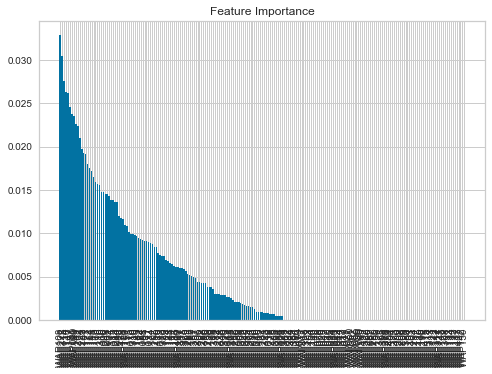

In [1136]:
# feature importance
importances = modelCART_NZV.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [ds_compLocIDNZV.columns[i] for i in indices]
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_trainClassi.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_trainClassi.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
# save model 

In [445]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelCART_NZV.sav'

In [446]:
# save model LR using pickle to .sav file
pickle.dump(modelCART_NZV, open(filename, 'wb'))

### Stochastic Gradient Descent Zero Variance Removed

In [447]:
seed=7
# kfold=KFold(n_splits=10,random_state=seed)

kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 
modelSGD_NZV=SGDClassifier(loss="log", penalty="l2", max_iter=5) 
results=cross_val_score(modelSGD_NZV,X_trainClassi,y_trainClassi,cv=kfold) 
print(results.mean())

0.4280512820512822


In [448]:
modelSGD_NZV = modelSGD_NZV.fit(X_trainClassi,y_trainClassi)
modelSGD_NZV

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [449]:
# more results from loaded model
print('The SGD_NZV scores per cv split, score array, train, test: ', 
      cross_val_score(modelSGD_NZV, X_trainClassi, y_trainClassi)) 

The SGD_NZV scores per cv split, score array, train, test:  [0.40934844 0.43518519 0.41778523]


In [450]:
# Make predictions using the test set
target_predSGD_NZV = modelSGD_NZV.predict(X_testClassi)

In [451]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predSGD_NZV, normalize = True)


0.4938461538461538

In [ ]:
# save model 

In [452]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelSGD_NZV.sav'

In [453]:
# save model LR using pickle to .sav file
pickle.dump(modelSGD_NZV, open(filename, 'wb'))

## Models (non-tuned)  RFE -- Non-Standardized Data

In [1032]:
# NOT EXECUTED
# ALL CODE BELOW NEEDS TO BE UPDATED WITH THE NAMES OF THE CORRECT TRAINING AND TEST SETS
# ONCE THEY ARE CREATED, PRIOR TO ANY CODE EXECUTION

## Models (non-tuned) Built Standardized Data

### Random Forest Standardized

In [499]:
num_trees=100 
max_features=3 
#kfold=KFold(n_splits=10,random_state=7) 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)
modelRF_STD=RandomForestClassifier(n_estimators=num_trees,max_features=max_features) 
#modelRF_STD=RandomForestClassifier()
results=cross_val_score(modelRF_STD,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.8402564102564104


In [500]:
modelRF_STD = modelRF_STD.fit(X_trainClassiSTD,y_trainClassiSTD)
modelRF_STD

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [501]:
# more results from loaded model
# uses stratified cross validation
print('The RFSTD scores per cv split, score array, train, test: ', 
      cross_val_score(modelRF_STD, X_trainClassiSTD, y_trainClassiSTD)) 

The RFSTD scores per cv split, score array, train, test:  [0.85369318 0.81818182 0.86264657]


In [911]:
# Make predictions using the test set
target_predRF_STD = modelRF_STD.predict(X_testClassiSTD)

In [912]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predRF_STD, normalize = True)


0.8615384615384616

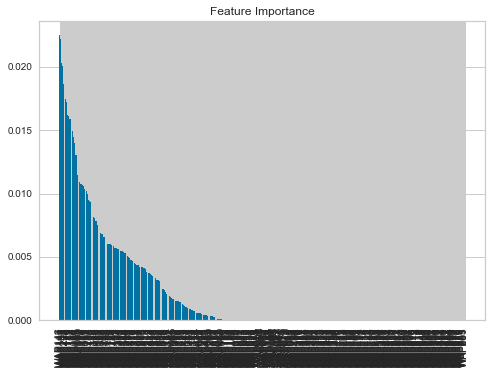

In [1137]:
# feature importance
importances = modelRF_STD.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [ds_compLocIDSTD.columns[i] for i in indices]
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_trainClassiSTD.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_trainClassiSTD.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
# save model 

In [504]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelRF_STD.sav'

In [505]:
# save model LR using pickle to .sav file
pickle.dump(modelRF_STD, open(filename, 'wb'))

### Neural Network Standardized

In [506]:


kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 

modelNNET_STD=MLPClassifier(alpha=1, max_iter=1000)

results=cross_val_score(modelNNET_STD,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.6952820512820514


In [507]:
modelNNET_STD = modelNNET_STD.fit(X_trainClassiSTD,y_trainClassiSTD)
modelNNET_STD

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [508]:
# more results from loaded model
print('The NNET_STD scores per cv split, score array, train, test: ', 
      cross_val_score(modelNNET_STD, X_trainClassiSTD, y_trainClassiSTD)) 

The NNET_STD scores per cv split, score array, train, test:  [0.70028409 0.68567026 0.7001675 ]


In [509]:
# Make predictions using the test set
target_predNNET_STD = modelNNET_STD.predict(X_testClassiSTD)

In [510]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predNNET_STD, normalize = True)


0.6861538461538461

In [ ]:
# save model 

In [511]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNNETnon.sav'

In [512]:
# save model LR using pickle to .sav file
pickle.dump(modelNNET, open(filename, 'wb'))

### KNN K-Nearest Neighbor Standardized

In [513]:
# The default value for the number of neighbors in KNN is 7.
seed=7
num_folds=10
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)
modelKNN_STD=KNeighborsClassifier(n_neighbors=3) 
results=cross_val_score(modelKNN_STD,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.6077948717948718


In [514]:
modelKNN_STD = modelKNN_STD.fit(X_trainClassiSTD,y_trainClassiSTD)
modelKNN_STD

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [515]:
# more results from loaded model
print('The KNNSTD scores per cv split, score array, train, test: ', 
      cross_val_score(modelKNN_STD, X_trainClassiSTD, y_trainClassiSTD)) 

The KNNSTD scores per cv split, score array, train, test:  [0.59375    0.57164869 0.59463987]


In [516]:
# Make predictions using the test set
target_predKNN_STD = modelKNN_STD.predict(X_testClassiSTD)

In [517]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predKNN_STD, normalize = True)


0.5846153846153846

In [ ]:
# save model 

In [518]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelKNN_STD.sav'

In [519]:
# save model LR using pickle to .sav file
pickle.dump(modelKNN_STD, open(filename, 'wb'))

### Naive Bayes Standardized

In [520]:
seed=7
#kfold=KFold(n_splits=10,random_state=seed)
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)
modelNB_STD=GaussianNB() 
results=cross_val_score(modelNB_STD,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.6309743589743589


In [521]:
modelNB_STD = modelNB_STD.fit(X_trainClassiSTD,y_trainClassiSTD)
modelNB_STD

GaussianNB(priors=None, var_smoothing=1e-09)

In [522]:
# more results from loaded model
print('The NBSTD scores per cv split, score array, train, test: ', 
      cross_val_score(modelNB_STD, X_trainClassiSTD, y_trainClassiSTD)) 

The NBSTD scores per cv split, score array, train, test:  [0.63068182 0.59938367 0.66164154]


In [523]:
# Make predictions using the test set
target_predNB_STD = modelNB_STD.predict(X_testClassiSTD)

In [524]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predNB_STD, normalize = True)


0.6261538461538462

In [ ]:
# save model 

In [525]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNB_STD.sav'

In [526]:
# save model LR using pickle to .sav file
pickle.dump(modelNB_STD, open(filename, 'wb'))

### CART Standardized

In [527]:
seed=7
#kfold=KFold(n_splits=10,random_state=seed)
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)
modelCART_STD=DecisionTreeClassifier() 
results=cross_val_score(modelCART_STD,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.6538461538461539


In [529]:
modelCART_STD = modelCART_STD.fit(X_trainClassiSTD,y_trainClassiSTD)
modelCART_STD

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [530]:
# more results from loaded model
print('The CART_STD scores per cv split, score array, train, test: ', 
      cross_val_score(modelCART_STD, X_trainClassiSTD, y_trainClassiSTD)) 

The CART_STD scores per cv split, score array, train, test:  [0.625      0.64098613 0.6599665 ]


In [531]:
# Make predictions using the test set
target_predCART_STD = modelCART_STD.predict(X_testClassiSTD)

In [532]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predCART_STD, normalize = True)


0.7153846153846154

In [ ]:
# save model 

In [533]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelCART_STD.sav'

In [534]:
# save model LR using pickle to .sav file
pickle.dump(modelCART_STD, open(filename, 'wb'))

### Stochastic Gradient Descent Standardized

In [535]:
seed=7
# kfold=KFold(n_splits=10,random_state=seed)
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 
modelSGD_STD=SGDClassifier(loss="log", penalty="l2", max_iter=5) 
results=cross_val_score(modelSGD_STD,X_trainClassiSTD,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.5949743589743589


In [536]:
modelSGD_STD = modelSGD_STD.fit(X_trainClassiSTD,y_trainClassiSTD)
modelSGD_STD

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [537]:
# more results from loaded model
print('The SGD_STD scores per cv split, score array, train, test: ', 
      cross_val_score(modelSGD_STD, X_trainClassiSTD, y_trainClassiSTD)) 

The SGD_STD scores per cv split, score array, train, test:  [0.56676136 0.58089368 0.60134003]


In [538]:
# Make predictions using the test set
target_predSGD_STD = modelSGD_STD.predict(X_testClassiSTD)

In [539]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predSGD_STD, normalize = True)


0.5969230769230769

In [540]:
# save model 

In [541]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelSGD_STD.sav'

In [542]:
# save model LR using pickle to .sav file
pickle.dump(modelSGD_STD, open(filename, 'wb'))

## Models (non-tuned) Built with PCA and Standardized Data

In [543]:
# NOTE: The Y parameter used are named y_trainClassiSTD or y_testClassiSTD

### Random Forest PCA

In [592]:
num_trees=100
max_features=3 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)
#kfold=KFold(n_splits=10,random_state=7) 
modelRFPCA=RandomForestClassifier(n_estimators=num_trees,max_features=max_features) 
results=cross_val_score(modelRFPCA,X_trainClassiPCA,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.6915384615384614


In [593]:
modelRFPCA = modelRFPCA.fit(X_trainClassiPCA,y_trainClassiSTD)
modelRFPCA

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [594]:
# more results from loaded model
# uses stratified cross validation
print('The RFPCA scores per cv split, score array, train, test: ', 
      cross_val_score(modelRFPCA, X_trainClassiPCA, y_trainClassiSTD)) 

The RFPCA scores per cv split, score array, train, test:  [0.69318182 0.66872111 0.69346734]


In [595]:
# Make predictions using the test set
target_predRFPCA = modelRFPCA.predict(X_testClassiPCA)

In [596]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predRFPCA, normalize = True)


0.6861538461538461

In [ ]:
# save model 

In [597]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelRFPCA.sav'

In [598]:
# save model LR using pickle to .sav file
pickle.dump(modelRFPCA, open(filename, 'wb'))

### Neural Network PCA

In [583]:
seed=7 
#kfold=KFold(n_splits=10,random_state=seed) 

kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 

modelNNETPCA=MLPClassifier(alpha=1, max_iter=1000)
results=cross_val_score(modelNNETPCA,X_trainClassiPCA,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.6882564102564104


In [586]:
modelNNETPCA = modelNNETPCA.fit(X_trainClassiPCA,y_trainClassiSTD)
modelNNETPCA

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [587]:
# more results from loaded model
print('The NNETPCA scores per cv split, score array, train, test: ', 
      cross_val_score(modelNNETPCA, X_trainClassiPCA, y_trainClassiSTD)) 

The NNETPCA scores per cv split, score array, train, test:  [0.69602273 0.69029276 0.69849246]


In [588]:
# Make predictions using the test set
target_predNNETPCA = modelNNETPCA.predict(X_testClassiPCA)

In [589]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predNNETPCA, normalize = True)


0.6707692307692308

In [ ]:
# save model 

In [590]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNNETPCA.sav'

In [591]:
# save model LR using pickle to .sav file
pickle.dump(modelNNETPCA, open(filename, 'wb'))

### KNN K-Nearest Neighbor PCA

In [599]:
# The default value for the number of neighbors in KNN is 7.
seed=7
num_folds=10
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)
#kfold=KFold(n_splits=num_folds,random_state=seed) 
modelKNNPCA=KNeighborsClassifier(n_neighbors=3) 
results=cross_val_score(modelKNNPCA,X_trainClassiPCA,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.6216923076923077


In [600]:
modelKNNPCA = modelKNNPCA.fit(X_trainClassiPCA,y_trainClassiSTD)
modelKNNPCA

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [601]:
# more results from loaded model
print('The KNNPCA scores per cv split, score array, train, test: ', 
      cross_val_score(modelKNNPCA, X_trainClassiPCA, y_trainClassiSTD)) 

The KNNPCA scores per cv split, score array, train, test:  [0.60369318 0.58397535 0.6080402 ]


In [602]:
# Make predictions using the test set
target_predKNNPCA = modelKNNPCA.predict(X_testClassiPCA)

In [603]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predKNNPCA, normalize = True)


0.5984615384615385

In [ ]:
# save model

In [604]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelKNNPCA.sav'

In [605]:
# save model LR using pickle to .sav file
pickle.dump(modelKNNPCA, open(filename, 'wb'))

### Naive Bayes PCA

In [606]:
seed=7
#kfold=KFold(n_splits=10,random_state=seed) 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)
modelNBPCA=GaussianNB() 
results=cross_val_score(modelNBPCA,X_trainClassiPCA,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.6102564102564102


In [607]:
modelNBPCA = modelNBPCA.fit(X_trainClassiPCA,y_trainClassiSTD)
modelNBPCA

GaussianNB(priors=None, var_smoothing=1e-09)

In [608]:
# more results from loaded model
print('The NBPCA scores per cv split, score array, train, test: ', 
      cross_val_score(modelNBPCA, X_trainClassiPCA, y_trainClassiSTD)) 

The NBPCA scores per cv split, score array, train, test:  [0.59375    0.61016949 0.61976549]


In [609]:
# Make predictions using the test set
target_predNBPCA = modelNBPCA.predict(X_testClassiPCA)

In [610]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predNBPCA, normalize = True)


0.6092307692307692

In [ ]:
# save model 

In [611]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNBPCA.sav'

In [612]:
# save model LR using pickle to .sav file
pickle.dump(modelNBPCA, open(filename, 'wb'))

### CART PCA

In [613]:
seed=7
#kfold=KFold(n_splits=10,random_state=seed) 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)
modelCARTPCA=DecisionTreeClassifier() 
results=cross_val_score(modelCARTPCA,X_trainClassiPCA,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.5382564102564102


In [614]:
modelCARTPCA = modelCARTPCA.fit(X_trainClassiPCA,y_trainClassiSTD)
modelCARTPCA

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [615]:
# more results from loaded model
print('The CARTPCA scores per cv split, score array, train, test: ', 
      cross_val_score(modelCARTPCA, X_trainClassiPCA, y_trainClassiSTD)) 

The CARTPCA scores per cv split, score array, train, test:  [0.50284091 0.51617874 0.51926298]


In [616]:
# Make predictions using the test set
target_predCARTPCA = modelCARTPCA.predict(X_testClassiPCA)

In [617]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predCARTPCA, normalize = True)


0.5461538461538461

In [ ]:
# save model 

In [618]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelCARTPCA.sav'

In [619]:
# save model LR using pickle to .sav file
pickle.dump(modelCARTPCA, open(filename, 'wb'))

### Stochastic Gradient Descent PCA

In [620]:
seed=7
# kfold=KFold(n_splits=10,random_state=seed)
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 
modelSGDPCA=SGDClassifier(loss="log", penalty="l2", max_iter=5) 
results=cross_val_score(modelSGDPCA,X_trainClassiPCA,y_trainClassiSTD,cv=kfold) 
print(results.mean())

0.5756410256410255


In [621]:
modelSGDPCA = modelSGDPCA.fit(X_trainClassiPCA,y_trainClassiSTD)
modelSGDPCA

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [622]:
# more results from loaded model
print('The SGDPCA scores per cv split, score array, train, test: ', 
      cross_val_score(modelSGDPCA, X_trainClassiPCA, y_trainClassiSTD)) 

The SGDPCA scores per cv split, score array, train, test:  [0.53977273 0.55932203 0.5678392 ]


In [623]:
# Make predictions using the test set
target_predSGDPCA = modelSGDPCA.predict(X_testClassiPCA)

In [624]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predSGDPCA, normalize = True)


0.5692307692307692

In [ ]:
# save model 

In [625]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelSGDPCA.sav'

In [626]:
# save model LR using pickle to .sav file
pickle.dump(modelSGDPCA, open(filename, 'wb'))

## Models (tuned) Original Data

### Random Forest  Tuned

In [ ]:
# tune using GridSearchCV and changing number of trees to 50, max features of 3
#https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv
# https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

In [829]:

num_trees=50

max_features=3 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)

modelRFTun=RandomForestClassifier()

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}


param_grid = { 
    'n_estimators': [50, 75],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gridRFTun = GridSearchCV(estimator=modelRFTun, param_grid=param_grid, cv= 5)


In [830]:
modelRFTun = gridRFTun.fit(X_trainClassOrig,y_trainClassOrig)
modelRFTun

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 75], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
# more results from loaded model
print('The RFTun (tuned) scores per cv split, score array, train, test: ', 
      cross_val_score(modelRFTun, X_trainClassOrig, y_trainClassOrig,cv=kfold)) 

In [831]:
# Make predictions using the test set
target_predRFTun = modelRFTun.predict(X_testClassOrig)

In [832]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassOrig, target_predRFTun, normalize = True)


0.7507692307692307

In [ ]:
# 'GridSearchCV' object has no attribute 'feature_importances_'

In [ ]:
# save model 

In [833]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelRFTun.sav'

In [834]:
# save model LR using pickle to .sav file
pickle.dump(modelRFTun, open(filename, 'wb'))

### Neural Network Tuned

In [1009]:
X_trainClassOrig.shape


(1950, 520)

In [1010]:
# GridSearchCV and parameter tuning https://www.kaggle.com/hatone/mlpclassifier-with-gridsearchcv
seed=7 
#kfold=KFold(n_splits=10,random_state=seed) 

kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 

parameters = {'hidden_layer_sizes':[519,519,519], 'max_iter':  [1000]}
 

gridNNETTun = GridSearchCV(MLPClassifier(),parameters, n_jobs=-1)



In [1011]:
modelNNETTun = gridNNETTun.fit(X_trainClassOrig,y_trainClassOrig)
modelNNETTun

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [519, 519, 519], 'max_iter': [1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [994]:
# more results from loaded model
print('The NNETTun scores per cv split, score array, train, test: ', 
     cross_val_score(modelNNETTun, X_trainClassOrig, y_trainClassOrig)) 

In [1012]:
# Make predictions using the test set
target_predNNETTun = modelNNETTun.predict(X_testClassOrig)

In [1013]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassOrig, target_predNNETTun, normalize = True)


0.6230769230769231

In [ ]:
# save model 

In [1014]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNNETTun.sav'

In [1015]:
# save model LR using pickle to .sav file
pickle.dump(modelNNETTun, open(filename, 'wb'))

### KNN K-Nearest Neighbor Tuned

In [835]:
# Tuned by using GridSearchCV and also adding a list of values for neighbors to try
scoring = 'accuracy'
seed=7
num_folds=10
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
modelKNNTun=KNeighborsClassifier() 

kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)
gridKNNTun = GridSearchCV(estimator=modelKNNTun, param_grid=param_grid, scoring=scoring, cv=kfold,
    iid=True)

In [836]:
modelKNNTun = gridKNNTun.fit(X_trainClassOrig,y_trainClassOrig)
modelKNNTun

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x1a7080f828>,
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [ ]:
# more results from loaded model invluding kfold
results=cross_val_score(modelKNNTun,X_trainClassOrig,y_trainClassOrig,cv=kfold) 
print(results.mean())
print('The KNNTun scores per cv split, score array, train, test: ', 
      cross_val_score(modelKNNTun, X_trainClassiSTD, y_trainClassOrig,cv=kfold)) 

In [837]:
# Make predictions using the test set
target_predKNNTun = modelKNNTun.predict(X_testClassOrig)

In [838]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassOrig, target_predKNNTun, normalize = True)


0.72

In [ ]:
# save model 

In [839]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelKNNTun.sav'

In [840]:
# save model LR using pickle to .sav file
pickle.dump(modelKNNTun, open(filename, 'wb'))

### Naive Bayes Tuned

In [1138]:
# Not executed no avenue for model tuning was found to work

In [ ]:
# Naive Bayes has few options for parameter smoothing 
# Various sites recommend looking at feature selection and pre-processing
# For example:  https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
# Unable to get GridSearch and RandomSearch tuning to work with NB
# ONLY ONE PARAMETER CHANGED is priors

### CART Tuned 

In [ ]:
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# https://s3.amazonaws.com/assets.datacamp.com/production/course_6280/slides/chapter5.pdf

In [889]:
# Tune parameters and use Grid Search
CARTTun=DecisionTreeClassifier(criterion="gini")#, max_depth=3) #0.11
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)

params_dt = {
#'max_depth': [3, 4,5, 6],  
#'min_samples_leaf': [0.04, 0.06, 0.08], 
'max_features': [0.2, 0.4,0.5,0.6, 0.7,0.8,0.9,0.95,0.99],
'splitter':['random'] # default is best
}

CARTTuned = GridSearchCV(estimator=CARTTun,
param_grid=params_dt,
scoring='accuracy'
,
cv=kfold,
n_jobs=-1)



In [890]:
modelCARTTuned = CARTTuned.fit(X_trainClassOrig,y_trainClassOrig)
modelCARTTuned

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x1a1cb9d828>,
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99], 'splitter': ['random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [ ]:
# more results from loaded model
print('The CARTTuned scores per cv split, score array, train, test: ', 
      cross_val_score(modelCARTTuned, X_trainClassOrig y_trainClassiOrig)) 

In [891]:
# Make predictions using the test set
target_predCARTTuned = modelCARTTuned.predict(X_testClassOrig)

In [892]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassOrig, target_predCARTTuned, normalize = True)


0.6861538461538461

In [ ]:
# save model 

In [893]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelCARTTuned.sav'

In [894]:
# save model LR using pickle to .sav file
pickle.dump(modelCARTTuned, open(filename, 'wb'))

### Stochastic Gradient Descent Tuned

In [821]:
X_trainClassOrig.shape

(1950, 520)

In [822]:
# https://scikit-learn.org/stable/modules/sgd.html
# find  max iterations
max_iter = np.ceil(10**6 / 1950)
max_iter

513.0

In [823]:
# Changed max iterations to 1000 and set an alpha
seed=7
# kfold=KFold(n_splits=10,random_state=seed)
alpha= [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 
#modelSGDTun=SGDClassifier(loss="log", penalty="l2", max_iter=5) 
modelSGDTun=SGDClassifier(loss="log", max_iter=max_iter, n_iter_no_change=4)


In [824]:
modelSGDTun = modelSGDTun.fit(X_trainClassOrig,y_trainClassOrig)
modelSGDTun

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=513.0,
       n_iter=None, n_iter_no_change=4, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# more results from loaded model
print('The SGDTun scores per cv split, score array, train, test: ', 
      cross_val_score(modelSGDTun, X_trainClassOrig, y_trainClassOrig)) 

In [825]:
# Make predictions using the test set
target_predSGDTun = modelSGDTun.predict(X_testClassOrig)

In [826]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassOrig, target_predSGDTun, normalize = True)


0.6415384615384615

In [ ]:
# save model 

In [827]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelSGDTun.sav'

In [828]:
# save model LR using pickle to .sav file
pickle.dump(modelSGDTun, open(filename, 'wb'))

## Models (tuned) with zero variance removed

### Random Forest  Tuned

In [645]:
# tune using Random Search and changing grid parameters.  Previously used # tress 100 and max features of 3
# Ran this algorithm twice, once with n-estimators set to 50,75 and then 50, 100, 200.  
# The accuracy for the test set did not change between runs

In [767]:
#https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv

num_trees=100 

max_features=3 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)

modelRFNZVTun=RandomForestClassifier()

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

param_grid = { 
    'n_estimators': [50, 100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


gridRFNZVTun = GridSearchCV(estimator=modelRFNZVTun, param_grid=param_grid, cv= kfold)


In [768]:
modelRFNZVTun = gridRFNZVTun.fit(X_trainClassi,y_trainClassi)
modelRFNZVTun

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x1a1cb8c470>,
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1105]:
# more results from loaded model
print('The RFTun (tuned) scores per cv split, score array, train, test: ', 
     cross_val_score(modelRFNZVTun, X_trainClassi, y_trainClassi,cv=kfold)) 

In [1106]:
# Make predictions using the test set
target_predRFNZVTun = modelRFNZVTun.predict(X_testClassi)

In [1107]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predRFNZVTun, normalize = True)


0.7723076923076924

In [ ]:
# save model 

In [751]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelRFNZVTun.sav'

In [752]:
# save model LR using pickle to .sav file
pickle.dump(modelRFNZVTun, open(filename, 'wb'))

### Neural Network tuned Zero Variance Removed

In [997]:
X_trainClassi.shape

(1950, 207)

In [1003]:
# https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/
# https://www.kaggle.com/hatone/mlpclassifier-with-gridsearchcv
# Parameter tuning and GridSearchCV
seed=7 
#kfold=KFold(n_splits=10,random_state=seed) 

kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 

parameters = {'hidden_layer_sizes':[206,206,206], 'max_iter':  [1000]}

          
gridNNETNZVTun = GridSearchCV(MLPClassifier(),parameters, n_jobs=-1)


In [1004]:
modelNNETNZVTun = gridNNETNZVTun.fit(X_trainClassi,y_trainClassi)
modelNNETNZVTun

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [206, 206, 206], 'max_iter': [1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
# more results from loaded model
print('The NNETNZVTun scores per cv split, score array, train, test: ', 
      cross_val_score(modelNNETNZVTun, X_trainClassi, y_trainClassi)) 

In [1005]:
# Make predictions using the test set
target_predNNETNZVTun = modelNNETNZVTun.predict(X_testClassi)

In [1006]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predNNETNZVTun, normalize = True)


0.6061538461538462

In [ ]:
# save model 

In [1007]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNNETNZVTun.sav'

In [1008]:
# save model LR using pickle to .sav file
pickle.dump(modelNNETNZVTun, open(filename, 'wb'))

### KNN K-Nearest Neighbor Tuned

In [650]:
# Tuned by using GridSearchCV and also adding a list of values for neighbors to try
scoring = 'accuracy'
seed=7
num_folds=10
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
modelKNNNZVTun=KNeighborsClassifier() 

kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)
#kfold=KFold(n_splits=num_folds,random_state=seed) 
gridKNNNZVTun = GridSearchCV(estimator=modelKNNNZVTun, param_grid=param_grid, scoring=scoring, cv=kfold,
    iid=True)

In [651]:
modelKNNNZVTun = gridKNNNZVTun.fit(X_trainClassi,y_trainClassi)
modelKNNNZVTun

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x1a52ef1eb8>,
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [652]:
# more results from loaded model
# cross validation training score
print('The KNNNZVTun scores per cv split, score array, train, test: ', 
      cross_val_score(modelKNNNZVTun, X_trainClassi, y_trainClassi)) 

The KNNNZVTun scores per cv split, score array, train, test:  [0.66572238 0.6712963  0.69630872]


In [ ]:
# more results from loaded model invluding kfold
results=cross_val_score(modelKNNNZVTun,X_trainClassOrig,y_trainClassOrig,cv=kfold) 
print(results.mean())
print('The KNNTun scores per cv split, score array, train, test: ', 
      cross_val_score(modelKNNNZVTun, X_trainClassi, y_trainClassi,cv=kfold)) 

In [653]:
# Make predictions using the test set
target_predKNNNZVTun = modelKNNNZVTun.predict(X_testClassi)

In [654]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predKNNNZVTun, normalize = True)


0.6907692307692308

In [ ]:
# save model 

In [655]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelKNNNZVTun.sav'

In [656]:
# save model LR using pickle to .sav file
pickle.dump(modelKNNNZVTun, open(filename, 'wb'))

### Naive Bayes Tuned

In [ ]:
# Not executed, no supported options for tuning found

In [ ]:
# Naive Bayes has few options for parameter smoothing 
# Various sites recommend looking at feature selection and pre-processing
# For example:  https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
# Unable to get GridSearch and RandomSearch tuning to work with NB
# ONLY ONE PARAMETER CHANGED is priors

modelNBNZVTun = modelNBNZVTun.fit(X_trainClassi,y_trainClassi)
modelNBNZVTun

### CART Tuned 

In [ ]:
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# https://s3.amazonaws.com/assets.datacamp.com/production/course_6280/slides/chapter5.pdf

In [722]:
# Tune parameters and use Grid Search

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# default criterion is gini, tied entropy but gini was better for results

CARTNZVTun=DecisionTreeClassifier(criterion="gini") 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)

params_dt = {
#'max_depth': [3, 4,5, 6],  REMOVED, DID NOT IMPROVE
#'min_samples_leaf': [0.04, 0.06, 0.08],  REMOVED, DID NOT IMPROVE
'max_features': [0.2, 0.4,0.5,0.6, 0.7,0.8,0.9,0.95,0.99],
'splitter':['random'] # default is best
}

CARTNZVTuned = GridSearchCV(estimator=CARTNZVTun,
param_grid=params_dt,
scoring='accuracy'
,
cv=kfold,
n_jobs=-1)



In [723]:
modelCARTNZVTuned = CARTNZVTuned.fit(X_trainClassi,y_trainClassi)
modelCARTNZVTuned

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x1a33741f60>,
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99], 'splitter': ['random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [ ]:
# more results from loaded model
print('The CARTNZVTuned scores per cv split, score array, train, test: ', 
      cross_val_score(modelCARTNZVTuned, X_trainClassi, y_trainClassi)) 

In [724]:
# Make predictions using the test set
target_predCARTNZVTuned = modelCARTNZVTuned.predict(X_testClassi)

In [725]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predCARTNZVTuned, normalize = True)


0.6892307692307692

In [ ]:
# save model 

In [726]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelCARTNZVTuned.sav'

In [727]:
# save model LR using pickle to .sav file
pickle.dump(modelCARTNZVTuned, open(filename, 'wb'))

### Stochastic Gradient Descent Tuned

In [729]:
X_trainClassi.shape

(1950, 207)

In [735]:
# https://scikit-learn.org/stable/modules/sgd.html
# find  max iterations
max_iter = np.ceil(10**6 / 1950)
max_iter                

513.0

In [741]:
# Changed max iterations 
seed=7
# kfold=KFold(n_splits=10,random_state=seed)
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 
modelSGDNZVTun=SGDClassifier(loss="log",  max_iter=max_iter, n_iter_no_change=4)


In [742]:
modelSGDNZVTun = modelSGDNZVTun.fit(X_trainClassi,y_trainClassi)
modelSGDNZVTun

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=513.0,
       n_iter=None, n_iter_no_change=4, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# more results from loaded model
print('The SGDNZVTun scores per cv split, score array, train, test: ', 
      cross_val_score(modelSGDNZVTun, X_trainClassi, y_trainClassi)) 

In [743]:
# Make predictions using the test set
target_predSGDNZVTun = modelSGDNZVTun.predict(X_testClassi)

In [744]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassi, target_predSGDNZVTun, normalize = True)


0.6338461538461538

In [ ]:
# save model 

In [745]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelSGDNZVTun.sav'

In [746]:
# save model LR using pickle to .sav file
pickle.dump(modelSGDNZVTun, open(filename, 'wb'))

## Models (tuned) Built with PCA and Standardized Data

### Random Forest Tuned PCA

In [ ]:
# tune using Random Search and changing number of trees to 100, max features is 3

In [761]:
#https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv

num_trees=100 

max_features=3 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)


modelRFPCATun=RandomForestClassifier()

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}


param_grid = { 
    'n_estimators': [50, 75],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gridRF = GridSearchCV(estimator=modelRFPCATun, param_grid=param_grid, cv= 5)


In [764]:
modelRFPCATun = gridRF.fit(X_trainClassiPCA,y_trainClassiSTD)
modelRFPCATun


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 75], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
# more results from loaded model
print('The RFPCATun (tuned) scores per cv split, score array, train, test: ', 
      cross_val_score(modelRFPCATun, X_trainClassiPCA, y_trainClassiSTD,cv=kfold)) 

In [765]:
# Make predictions using the test set
target_predRFPCATun = modelRFPCATun.predict(X_testClassiPCA)

In [766]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predRFPCATun, normalize = True)


0.66

In [ ]:
# 'GridSearchCV' object has no attribute 'feature_importances_'

In [ ]:
# save model 

In [ ]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelRFPCATun.sav'

In [ ]:
# save model LR using pickle to .sav file
pickle.dump(modelRFPCATun, open(filename, 'wb'))

### Neural Network Tuned PCA

In [1016]:
X_trainClassiPCA.shape

(1950, 100)

In [1017]:
# Parameter tuning and GridSearchCV
seed=7 
#kfold=KFold(n_splits=10,random_state=seed) 

kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 

parameters = {'hidden_layer_sizes':[100,100,100], 'max_iter':  [1000]}
           
gridNNETPCATun = GridSearchCV(MLPClassifier(),parameters, n_jobs=-1)



In [1018]:
modelNNETPCATun = gridNNETPCATun.fit(X_trainClassiPCA,y_trainClassiSTD)
modelNNETPCATun

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [100, 100, 100], 'max_iter': [1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
# more results from loaded model
print('The NNETPCATun scores per cv split, score array, train, test: ', 
      cross_val_score(modelNNETPCATun, X_trainClassiPCA, y_trainClassiSTD)) 

In [1019]:
# Make predictions using the test set
target_predNNETPCATun = modelNNETPCATun.predict(X_testClassiPCA)

In [1020]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predNNETPCATun, normalize = True)


0.66

In [ ]:
# save model 

In [1021]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelNNETPCATun.sav'

In [1022]:
# save model LR using pickle to .sav file
pickle.dump(modelNNETPCATun, open(filename, 'wb'))

### KNN K-Nearest Neighbor PCA Tuned

In [771]:
# Tuned by using GridSearchCV and also adding a list of values for neighbors to try
scoring = 'accuracy'
seed=7
num_folds=10
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
modelKNNPCATun=KNeighborsClassifier() 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)
#kfold=KFold(n_splits=num_folds,random_state=seed) 
gridKNNPCA = GridSearchCV(estimator=modelKNNPCATun, param_grid=param_grid, scoring=scoring, cv=kfold,
    iid=True)

In [772]:
modelKNNPCATun = gridKNNPCA.fit(X_trainClassiPCA,y_trainClassiSTD)
modelKNNPCATun

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x1a708a7eb8>,
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [1183]:
# more results from loaded model invluding kfold

print('The KNNPCATun scores per cv split, score array, train, test: ', 
      cross_val_score(modelKNNPCATun, X_trainClassiPCA, y_trainClassiSTD,cv=kfold)) 

In [773]:
# Make predictions using the test set
target_predKNNPCATuned = modelKNNPCATun.predict(X_testClassiPCA)

In [774]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predKNNPCATuned, normalize = True)


0.676923076923077

In [ ]:
# save model 

In [775]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelKNNPCATun.sav'

In [776]:
# save model LR using pickle to .sav file
pickle.dump(modelKNNPCATun, open(filename, 'wb'))

### Naive Bayes Tuned PCA

In [ ]:
# Not exeucuted, no working or recommended options found for tuning

In [ ]:
# Naive Bayes has few options for parameter smoothing 
# Various sites recommend looking at feature selection and pre-processing
# For example:  https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
# Unable to get GridSearch and RandomSearch tuning to work with NB
# ONLY ONE PARAMETER CHANGED is priors

### CART Tuned PCA

In [ ]:
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# https://s3.amazonaws.com/assets.datacamp.com/production/course_6280/slides/chapter5.pdf

In [957]:
# Tune parameters and use Grid Search
CARTPCATuned=DecisionTreeClassifier(criterion="gini")#, max_depth=3)
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None)

params_dt = {
#'max_depth': [3, 4,5, 6], # REMOVED, DID NOT IMPROVE
#'min_samples_leaf': [0.04, 0.06, 0.08], # REMOVED, DID NOT IMPROVE
'max_features': [0.2, 0.4,0.5,0.6, 0.7,0.8,0.9,0.95,0.99],
'splitter':['random'] # default is best
}


CARTPCATun = GridSearchCV(estimator=CARTPCATuned,
param_grid=params_dt,
scoring='accuracy'
,
cv=kfold,
n_jobs=-1)


In [958]:
modelCARTPCATuned = CARTPCATun.fit(X_trainClassiPCA,y_trainClassiSTD)
modelCARTPCATuned

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x1a6f629240>,
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99], 'splitter': ['random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [1181]:
# more results from loaded model
print('The CART PCA Tuned scores per cv split, score array, train, test: ', 
      cross_val_score(modelCARTPCATuned, X_trainClassiPCA, y_trainClassiSTD)) 

The CART PCA Tuned scores per cv split, score array, train, test:  [0.51278409 0.53158706 0.51256281]


In [961]:
# Make predictions using the test set
target_predCARTPCATuned = modelCARTPCATuned.predict(X_testClassiPCA)

In [962]:
# Compare the model’s prediction with actual target values for the test set
accuracyScoreCARTPCATuned = accuracy_score(y_testClassiSTD, target_predCARTPCATuned, normalize = True)
accuracyScoreCARTPCATuned

0.5384615384615384

In [ ]:
# save model 

In [811]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelCARTPCATuned.sav'

In [812]:
# save model LR using pickle to .sav file
pickle.dump(modelCARTPCATuned, open(filename, 'wb'))

### Stochastic Gradient Descent Tuned

In [813]:
X_trainClassiPCA.shape

(1950, 100)

In [814]:
# https://scikit-learn.org/stable/modules/sgd.html
# find  max iterations
max_iter = np.ceil(10**6 / 1950)
max_iter

513.0

In [815]:
# Changed max iterations and set an alpha
seed=7
# kfold=KFold(n_splits=10,random_state=seed)
alpha= [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 

modelSGDPCATun=SGDClassifier(loss="log",  max_iter=max_iter, n_iter_no_change=4)


In [817]:
modelSGDPCATuned = modelSGDPCATun.fit(X_trainClassiPCA,y_trainClassiSTD)
modelSGDPCATuned

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=513.0,
       n_iter=None, n_iter_no_change=4, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# more results from loaded model
print('The SGDPCATuned scores per cv split, score array, train, test: ', 
      cross_val_score(modelSGDPCATuned, X_trainClassiPCA, y_trainClassiSTD)) 

In [818]:
# Make predictions using the test set
target_predSGDPCATuned = modelSGDPCATuned.predict(X_testClassiPCA)

In [819]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassiSTD, target_predSGDPCATuned, normalize = True)


0.6138461538461538

In [ ]:
# save model 

In [820]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelSGDPCATuned.sav'

# Compare Model Outputs Using scikit-learn

## Compare Models (non-tuned) Built with Non-Standardized Data

In [1139]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

models = []
models.append(('RandomForestClassifier',modelRF))
models.append(('MLPClassifier',modelNNET))
models.append(('KNN',modelKNN))
models.append(('GaussianNB',modelNB))
models.append(('CART',modelCART))
models.append(('SGDClassifier',modelSGD))


# http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
names = []
for name, model in models:
    predicted = model.predict(X_testClassOrig)
    names.append(name)
    matrix = confusion_matrix(y_testClassOrig, predicted) 
    print ( name + '\n', 'Confusion Matrix :')
    print(matrix, '\n')
   
   
   
for name, model in models:
    predicted = model.predict(X_testClassOrig)
    names.append(name)
    print (name,'Kappa Score : ', cohen_kappa_score(y_testClassOrig, predicted), '\n' )
     
    
    
for name, model in models:
    predictedA = model.predict(X_testClassOrig)
    names.append(name)
    print (name,'Accuracy Score : ', accuracy_score(y_testClassOrig, predictedA), '\n' )
    
for name, model in models:
    predictedB = model.predict(X_testClassOrig)
    names.append(name)
    report = classification_report(y_testClassOrig, predictedB)
    print( '\n The models classification report of ', name, 'is:' , '\n', report, '\n')
    
   

RandomForestClassifier
 Confusion Matrix :
[[ 4  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  3]] 

MLPClassifier
 Confusion Matrix :
[[5 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 2]] 

KNN
 Confusion Matrix :
[[ 3  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  3]] 

GaussianNB
 Confusion Matrix :
[[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 8 0]
 [0 0 0 ... 0 0 2]] 

CART
 Confusion Matrix :
[[ 4  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  7  1]
 [ 0  0  0 ...  0  0  3]] 

SGDClassifier
 Confusion Matrix :
[[ 5  0  0 ...  0  0  0]
 [ 2  2  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 


 The models classification report of  KNN is: 
               precision    recall  f1-score   support

        0101       1.00      0.60      0.75         5
        0102       1.00      0.75      0.86         4
       02021       0.50      0.85      0.63        13
       02022       0.00      0.00      0.00         1
       02031       0.00      0.00      0.00         3
       02032       0.33      0.33      0.33         3
       02132       0.00      0.00      0.00         2
       02161       0.43      1.00      0.60         3
       02162       0.40      0.33      0.36         6
       02221       0.67      0.67      0.67         3
       02222       0.80      0.67      0.73         6
       02271       0.00      0.00      0.00         5
       02272       0.00      0.00      0.00         2
       02281       0.00      0.00      0.00         5
       02282       0.00      0.00      0.00         3
       02291       0.00      0.00      0.00         3
       02292       0.12      1.0


 The models classification report of  GaussianNB is: 
               precision    recall  f1-score   support

        0101       0.75      0.60      0.67         5
        0102       1.00      0.25      0.40         4
       02021       0.82      0.69      0.75        13
       02022       0.00      0.00      0.00         1
       02031       0.50      0.33      0.40         3
       02032       0.00      0.00      0.00         3
       02132       1.00      1.00      1.00         2
       02161       1.00      0.33      0.50         3
       02162       0.50      0.50      0.50         6
       02221       0.20      0.33      0.25         3
       02222       1.00      0.83      0.91         6
       02271       0.75      0.60      0.67         5
       02272       0.00      0.00      0.00         2
       02281       0.00      0.00      0.00         5
       02282       0.00      0.00      0.00         3
       02291       0.00      0.00      0.00         3
       02292       0.00  

## Compare Models (non-tuned) Built with Standardized Data

In [1103]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

models = []
models.append(('RandomForestClassifier',modelRF_STD))
models.append(('MLPClassifier',modelNNET_STD))
models.append(('KNN',modelKNN_STD))
models.append(('GaussianNB',modelNB_STD))
models.append(('CART',modelCART_STD))
models.append(('SGDClassifier',modelSGD_STD))



names = []
for name, model in models:
    predicted = model.predict(X_testClassiSTD)
    names.append(name)
    matrix = confusion_matrix(y_testClassiSTD, predicted) 
    print ( name + '\n', 'Confusion Matrix :')
    print(matrix, '\n')
    #graphing removed, not rendering well 
   # plt.clf()
    #plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Wistia)
    #classNames = ['Negative','Positive']
    #plt.title( name)
    #plt.ylabel('True label')
    #plt.xlabel('Predicted label')
    #tick_marks = np.arange(len(classNames))
    #plt.xticks(tick_marks, classNames, rotation=45)
    #plt.yticks(tick_marks, classNames)
    #s = [['TN','FP'], ['FN', 'TP']]
    
   # for i in range(2):
    #    for j in range(2):
     #       plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    #plt.show()
   
for name, model in models:
    predicted = model.predict(X_testClassiSTD)
    names.append(name)
    print (name,'Kappa Score : ', cohen_kappa_score(y_testClassiSTD, predicted), '\n' )    


for name, model in models:
    predicted = model.predict(X_testClassiSTD)
    names.append(name)
    print (name,'Accuracy Score : ', accuracy_score(y_testClassiSTD, predicted), '\n' )
    
for name, model in models:
    predicted = model.predict(X_testClassiSTD)
    names.append(name)
    report = classification_report(y_testClassiSTD, predicted)
    print( '\n The models classification report of ', name, 'is:' , '\n', report, '\n')
    
   

RandomForestClassifier
 Confusion Matrix :
[[ 4  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  2]] 

MLPClassifier
 Confusion Matrix :
[[4 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 2]] 

KNN
 Confusion Matrix :
[[2 0 0 ... 0 0 0]
 [1 2 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 2]] 

GaussianNB
 Confusion Matrix :
[[ 3  0  0 ...  0  0  0]
 [ 1  2  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  2]] 

CART
 Confusion Matrix :
[[ 5  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  1  2]] 

SGDClassifier
 Confusion Matrix :
[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ..

 The models classification report of  MLPClassifier is: 
               precision    recall  f1-score   support

        0101       1.00      0.67      0.80         6
        0102       1.00      0.67      0.80         3
       02021       0.73      0.62      0.67        13
       02022       0.00      0.00      0.00         5
       02031       0.00      0.00      0.00         2
       02032       0.33      0.33      0.33         3
       02161       0.60      1.00      0.75         3
       02162       0.44      0.80      0.57         5
       02221       0.00      0.00      0.00         1
       02222       1.00      0.71      0.83         7
       02271       0.33      0.33      0.33         3
       02272       0.00      0.00      0.00         1
       02281       1.00      0.33      0.50         3
       02282       0.20      0.50      0.29         2
       02291       0.33      0.33      0.33         3
       02292       0.10      0.50      0.17         2
       02301       0.00


 The models classification report of  KNN is: 
               precision    recall  f1-score   support

        0101       0.67      0.33      0.44         6
        0102       1.00      0.67      0.80         3
       02021       0.58      0.54      0.56        13
       02022       0.00      0.00      0.00         5
       02031       0.00      0.00      0.00         2
       02032       0.00      0.00      0.00         3
       02161       0.38      1.00      0.55         3
       02162       0.12      0.20      0.15         5
       02221       0.00      0.00      0.00         1
       02222       0.80      0.57      0.67         7
       02271       0.14      0.33      0.20         3
       02272       0.00      0.00      0.00         1
       02281       0.67      0.67      0.67         3
       02282       0.14      0.50      0.22         2
       02291       0.25      0.33      0.29         3
       02292       0.40      1.00      0.57         2
       02301       0.00      0.0

## Compare Models (non-tuned) Built with Standardized Data and PCA

In [1102]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

models = []
models.append(('RandomForestClassifier',modelRFPCA))
models.append(('MLPClassifier',modelNNETPCA))
models.append(('GaussianNB',modelNBPCA))
models.append(('KNN',modelKNNPCA))
models.append(('CART',modelCARTPCA))
models.append(('SGDClassifier',modelSGDPCA))

names = []
for name, model in models:
    predicted = model.predict(X_testClassiPCA)
    names.append(name)
    matrix = confusion_matrix(y_testClassiSTD, predicted) 
    print ( name + '\n', 'Confusion Matrix :')
    print(matrix, '\n')
    
for name, model in models:
    predicted = model.predict(X_testClassiPCA)
    names.append(name)
    print (name,'Kappa Score : ', cohen_kappa_score(y_testClassiSTD, predicted), '\n' )    
    
    
for name, model in models:
    predicted = model.predict(X_testClassiPCA)
    names.append(name)
    print (name,'Accuracy Score : ', accuracy_score(y_testClassiSTD, predicted), '\n' )
    
for name, model in models:
    predicted = model.predict(X_testClassiPCA)
    names.append(name)
    report = classification_report(y_testClassiSTD, predicted)
    print( '\n The models classification report of ', name, 'is:' , '\n', report, '\n')
    
   

RandomForestClassifier
 Confusion Matrix :
[[ 4  0  0 ...  0  0  0]
 [ 1  2  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  2]] 

MLPClassifier
 Confusion Matrix :
[[5 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 2]] 

GaussianNB
 Confusion Matrix :
[[4 0 0 ... 0 0 0]
 [2 1 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 2]] 

KNN
 Confusion Matrix :
[[3 0 0 ... 0 0 0]
 [1 2 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 2]] 

CART
 Confusion Matrix :
[[6 0 0 ... 0 0 0]
 [2 1 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 2]] 

SGDClassifier
 Confusion Matrix :
[[ 4  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  2]] 

Rando


 The models classification report of  KNN is: 
               precision    recall  f1-score   support

        0101       0.75      0.50      0.60         6
        0102       1.00      0.67      0.80         3
       02021       0.73      0.62      0.67        13
       02022       0.00      0.00      0.00         5
       02031       0.50      0.50      0.50         2
       02032       0.00      0.00      0.00         3
       02161       0.43      1.00      0.60         3
       02162       0.27      0.60      0.37         5
       02221       0.00      0.00      0.00         1
       02222       1.00      0.71      0.83         7
       02271       0.20      0.33      0.25         3
       02272       0.00      0.00      0.00         1
       02281       0.50      0.67      0.57         3
       02282       0.14      0.50      0.22         2
       02291       0.33      0.67      0.44         3
       02292       0.20      0.50      0.29         2
       02301       0.00      0.0

## Compare Models non-tuned) built with Near Zero Variance Features Removed

In [1101]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

models = []
models.append(('RandomForestClassifier',modelRF_NZV))
models.append(('MLPClassifier',modelNNET_NZV))
models.append(('GaussianNB',modelNB_NZV))
models.append(('KNN',modelKNN_NZV))
models.append(('CART',modelCART_NZV))
models.append(('SGDClassifier',modelSGD_NZV))


names = []
for name, model in models:
    predicted = model.predict(X_testClassi)
    names.append(name)
    matrix = confusion_matrix(y_testClassi, predicted) 
    print ( name + '\n', 'Confusion Matrix :')
    print(matrix, '\n')
    
    
    
for name, model in models:
    predicted = model.predict(X_testClassi)
    names.append(name)
    print (name,'Kappa Score : ', cohen_kappa_score(y_testClassi, predicted), '\n' )    
    
    
for name, model in models:
    predicted = model.predict(X_testClassi)
    names.append(name)
    print (name,'Accuracy Score : ', accuracy_score(y_testClassi, predicted), '\n' )
    
for name, model in models:
    predicted = model.predict(X_testClassi)
    names.append(name)
    report = classification_report(y_testClassi, predicted)
    print( '\n The models classification report of ', name, 'is:' , '\n', report, '\n')
    

RandomForestClassifier
 Confusion Matrix :
[[ 2  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  1  4]] 

MLPClassifier
 Confusion Matrix :
[[ 3  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  2  3]] 

GaussianNB
 Confusion Matrix :
[[ 3  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  3]] 

KNN
 Confusion Matrix :
[[ 2  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  4]] 

CART
 Confusion Matrix :
[[ 6  0  0 ...  0  0  0]
 [ 1  2  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  3  1]
 [ 0  0  0 ...  0  0  5]] 

SGDClassifier
 Confusion Matrix :
[[ 5  1  0 ...  0  


 The models classification report of  KNN is: 
               precision    recall  f1-score   support

        0101       1.00      0.25      0.40         8
        0102       1.00      0.67      0.80         3
       02021       0.52      0.79      0.63        14
       02022       0.50      0.20      0.29         5
       02031       0.00      0.00      0.00         3
       02032       0.00      0.00      0.00         2
       02132       1.00      0.50      0.67         2
       02161       0.33      1.00      0.50         2
       02162       0.25      0.40      0.31         5
       02221       0.00      0.00      0.00         3
       02222       0.71      0.56      0.63         9
       02271       0.11      0.50      0.18         2
       02272       0.00      0.00      0.00         2
       02281       0.00      0.00      0.00         3
       02282       0.00      0.00      0.00         2
       02291       0.11      0.50      0.18         2
       02292       0.00      0.0

## Compare Models (tuned) Built Original Data

In [1098]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

models = []
models.append(('RandomForestClassifier',modelRFTun))
models.append(('MLPClassifier',modelNNETTun))
#models.append(('GaussianNB',modelNBTun))
models.append(('KNN',modelKNNTun))
models.append(('CART',modelCARTTuned))
models.append(('SGDClassifier',modelSGDTun))


names = []
for name, model in models:
    predicted = model.predict(X_testClassOrig)
    names.append(name)
    matrix = confusion_matrix(y_testClassOrig, predicted) 
    print ( name + '\n', 'Confusion Matrix :')
    print(matrix, '\n')
    
    
for name, model in models:
    predicted = model.predict(X_testClassOrig)
    names.append(name)
    print (name,'Kappa Score : ', cohen_kappa_score(y_testClassOrig, predicted), '\n' )    
    
    
for name, model in models:
    predicted = model.predict(X_testClassOrig)
    names.append(name)
    print (name,'Accuracy Score : ', accuracy_score(y_testClassOrig, predicted), '\n' )
    
for name, model in models:
    predicted = model.predict(X_testClassOrig)
    names.append(name)
    report = classification_report(y_testClassOrig, predicted)
    print( '\n The models classification report of ', name, 'is:' , '\n', report, '\n')
    

RandomForestClassifier
 Confusion Matrix :
[[ 5  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  3]] 

MLPClassifier
 Confusion Matrix :
[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 3]] 

KNN
 Confusion Matrix :
[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 0 1 2]] 

CART
 Confusion Matrix :
[[4 1 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 0 0 3]] 

SGDClassifier
 Confusion Matrix :
[[ 4  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  3]] 

RandomForestClassifier Kappa Score :  0.7572623792595785 

MLPClassifier Kappa Score :  0.619080195279704 

KNN Kappa Score :  0.7171108480696342 

CART Kappa


 The models classification report of  KNN is: 
               precision    recall  f1-score   support

        0101       1.00      0.60      0.75         5
        0102       1.00      1.00      1.00         4
       02021       0.80      0.62      0.70        13
       02022       0.25      1.00      0.40         1
       02031       1.00      0.33      0.50         3
       02032       0.14      0.33      0.20         3
       02132       1.00      0.50      0.67         2
       02161       0.75      1.00      0.86         3
       02162       0.60      0.50      0.55         6
       02221       0.00      0.00      0.00         3
       02222       0.86      1.00      0.92         6
       02271       0.50      0.20      0.29         5
       02272       0.25      0.50      0.33         2
       02281       0.33      0.20      0.25         5
       02282       0.00      0.00      0.00         3
       02291       0.00      0.00      0.00         3
       02292       0.17      1.0

## Compare Models (tuned) Built with Standardized Data and PCA

In [1100]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

models = []
models.append(('RandomForestClassifier',modelRFPCATun))
models.append(('MLPClassifier',modelNNETPCATun))
models.append(('KNN',modelKNNPCATun))
#models.append(('GaussianNB',modelNBPCATun))
models.append(('CART',modelCARTPCATuned))
models.append(('SGDClassifier',modelSGDPCATun))



names = []
for name, model in models:
    predicted = model.predict(X_testClassiPCA)
    names.append(name)
    matrix = confusion_matrix(y_testClassiSTD, predicted) 
    print ( name + '\n', 'Confusion Matrix :')
    print(matrix, '\n')
    
for name, model in models:
    predicted = model.predict(X_testClassiPCA)
    names.append(name)
    print (name,'Kappa Score : ', cohen_kappa_score(y_testClassiSTD, predicted), '\n' )    
    
    
for name, model in models:
    predicted = model.predict(X_testClassiPCA)
    names.append(name)
    print (name,'Accuracy Score : ', accuracy_score(y_testClassiSTD, predicted), '\n' )
    
for name, model in models:
    predicted = model.predict(X_testClassiPCA)
    names.append(name)
    report = classification_report(y_testClassiSTD, predicted)
    print( '\n The models classification report of ', name, 'is:' , '\n', report, '\n')
    
   

RandomForestClassifier
 Confusion Matrix :
[[5 0 0 ... 0 0 0]
 [1 2 0 ... 0 0 0]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 2]] 

MLPClassifier
 Confusion Matrix :
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 2]] 

KNN
 Confusion Matrix :
[[3 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 2]] 

CART
 Confusion Matrix :
[[5 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 1]] 

SGDClassifier
 Confusion Matrix :
[[4 0 0 ... 0 0 0]
 [1 2 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 2]] 

RandomForestClassifier Kappa Score :  0.6564925655091276 

MLPClassifier Kappa Score :  0.6566067053128548 

KNN Kappa Score :  0.6737298770212614 

CART Kappa Score :  0.5338853405744446 

SGDClassifier Kappa Score :  0.609915766

## Compare Models (tuned) Built with Zero Variance Features Removed

In [1095]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

models = []
models.append(('RandomForestClassifier',modelRFNZVTun))
models.append(('MLPClassifier',modelNNETNZVTun))
models.append(('KNN',modelKNNNZVTun))
#models.append(('GaussianNB',modelNBNZVTun))
models.append(('CART',modelCARTNZVTuned))
models.append(('SGDClassifier',modelSGDNZVTun))


for name, model in models:
    predicted = model.predict(X_testClassi)
    names.append(name)
    matrix = confusion_matrix(y_testClassi, predicted) 
    print ( name + '\n', 'Confusion Matrix :')
    print(matrix, '\n')
    
for name, model in models:
    predicted = model.predict(X_testClassi)
    names.append(name)
    print (name,'Kappa Score : ', cohen_kappa_score(y_testClassi, predicted), '\n' )    

for name, model in models:
    predicted = model.predict(X_testClassi)
    names.append(name)
    print (name,'Accuracy Score : ', accuracy_score(y_testClassi, predicted), '\n' )
    
for name, model in models:
    predicted = model.predict(X_testClassi)
    names.append(name)
    report = classification_report(y_testClassi, predicted)
    print( '\n The models classification report of ', name, 'is:' , '\n', report, '\n')
    

RandomForestClassifier
 Confusion Matrix :
[[ 8  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  5]] 

MLPClassifier
 Confusion Matrix :
[[ 2  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  4]] 

KNN
 Confusion Matrix :
[[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 1 4]] 

CART
 Confusion Matrix :
[[ 6  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  5]] 

SGDClassifier
 Confusion Matrix :
[[ 2  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  1  4]] 

RandomForestClassifier Kappa Score :  0.7695924276862721 

MLPClassifier Kappa Score :


 The models classification report of  KNN is: 
               precision    recall  f1-score   support

        0101       1.00      0.25      0.40         8
        0102       0.75      1.00      0.86         3
       02021       0.90      0.64      0.75        14
       02022       0.80      0.80      0.80         5
       02031       0.00      0.00      0.00         3
       02032       0.50      0.50      0.50         2
       02132       1.00      1.00      1.00         2
       02161       0.50      1.00      0.67         2
       02162       1.00      0.40      0.57         5
       02221       0.00      0.00      0.00         3
       02222       0.86      0.67      0.75         9
       02271       0.00      0.00      0.00         2
       02272       0.00      0.00      0.00         2
       02281       0.33      0.67      0.44         3
       02282       0.00      0.00      0.00         2
       02291       0.20      0.50      0.29         2
       02292       0.00      0.0

## Compare Top Models

In [ ]:
# https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/
# https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html
# https://stats.stackexchange.com/questions/97412/precision-and-recall-are-equal-when-the-size-is-same

## Random Forest Not Tuned with Standardized Data

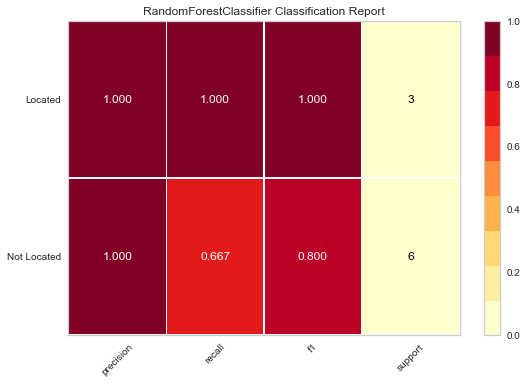

In [1112]:
classes = ["Not Located", "Located"]
# Instantiate the classification model and visualizer

visualizer = ClassificationReport(modelRF_STD, classes=classes, support=True)

visualizer.fit(X_trainClassiSTD, y_trainClassiSTD)  # Fit the visualizer and the model
visualizer.score(X_testClassiSTD, y_testClassiSTD)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [1045]:
# Count the number of yes and no values that are returned
D = dict(zip(*np.unique(target_predRF_STD, return_counts=True)))
print(D)


{'0101': 4, '0102': 2, '02021': 13, '02022': 5, '02031': 2, '02032': 3, '02161': 4, '02162': 7, '02221': 1, '02222': 6, '02271': 2, '02272': 3, '02281': 3, '02282': 3, '02291': 5, '02292': 6, '02301': 3, '02302': 1, '02311': 1, '02352': 1, '02371': 4, '02372': 4, '02381': 3, '02382': 3, '02392': 2, '02432': 2, '02441': 10, '02442': 5, '02452': 1, '02462': 1, '02471': 8, '02472': 2, '02481': 6, '02491': 3, '02492': 1, '092': 4, '12012': 7, '12021': 2, '12022': 6, '12031': 2, '12032': 3, '12041': 4, '12042': 4, '12052': 2, '12062': 5, '12072': 7, '12082': 2, '12092': 5, '12102': 8, '12152': 2, '2101': 4, '21012': 8, '2102': 12, '21021': 5, '21022': 5, '21031': 4, '21032': 7, '21041': 5, '21042': 6, '21051': 2, '21052': 1, '21061': 4, '21062': 10, '21072': 4, '21082': 2, '21092': 4, '21102': 5, '21112': 4, '21122': 6, '21172': 2, '2151': 4, '2152': 3, '2161': 4, '2162': 4, '2171': 2, '2172': 3, '2181': 1, '2182': 1, '22011': 6, '22012': 14, '22021': 10, '22022': 7, '22031': 4, '22032': 4,

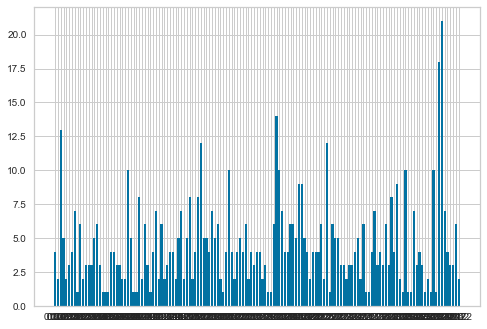

In [1046]:
# graph the number of yes and no values returned
# https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))

plt.show()

## Random Forest not Tuned with Original Data

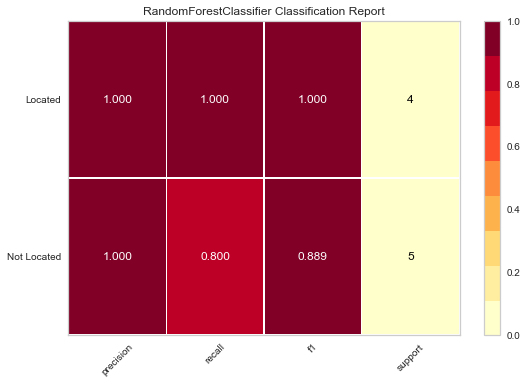

In [1113]:
classes = ["Not Located", "Located"] 
# Instantiate the classification model and visualizer

visualizer = ClassificationReport(modelRF, classes=classes, support=True)

visualizer.fit(X_trainClassOrig, y_trainClassOrig)  # Fit the visualizer and the model
visualizer.score(X_testClassOrig, y_testClassOrig)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [1048]:
# Count the number of yes and no values that are returned
DD = dict(zip(*np.unique(target_predRF, return_counts=True)))
print(DD)


{'0101': 4, '0102': 4, '02021': 14, '02022': 1, '02031': 3, '02032': 3, '02132': 2, '02161': 3, '02162': 5, '02221': 3, '02222': 6, '02272': 3, '02281': 3, '02282': 1, '02291': 3, '02292': 6, '02301': 6, '02311': 3, '02312': 2, '02352': 2, '02371': 1, '02372': 4, '02381': 5, '02382': 1, '02392': 5, '02432': 1, '02441': 9, '02442': 2, '02452': 2, '02462': 4, '02471': 12, '02472': 2, '02481': 12, '02482': 4, '02491': 4, '02492': 2, '092': 3, '12012': 5, '12021': 1, '12022': 5, '12031': 4, '12041': 1, '12042': 1, '12052': 6, '12062': 6, '12072': 5, '12082': 3, '12092': 2, '12102': 3, '12152': 3, '2101': 3, '21011': 2, '21012': 7, '2102': 13, '21021': 4, '21022': 7, '21031': 7, '21032': 8, '21041': 5, '21042': 4, '21051': 2, '21052': 3, '21061': 2, '21062': 12, '21072': 7, '21082': 7, '21092': 4, '21102': 4, '21112': 4, '21122': 4, '21172': 2, '2151': 1, '2152': 2, '2161': 2, '2162': 3, '2171': 2, '2172': 3, '2182': 2, '22011': 10, '22012': 14, '22021': 6, '22022': 10, '22031': 2, '22032':

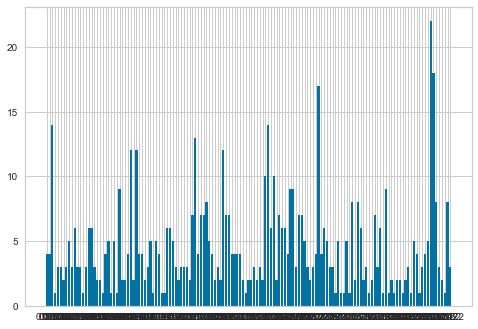

In [1049]:
# graph the number of yes and no values returned
# https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary
plt.bar(range(len(DD)), list(DD.values()), align='center')
plt.xticks(range(len(DD)), list(DD.keys()))

plt.show()

## Random Forest Not Tuned with Near Zero Variance Features Removed

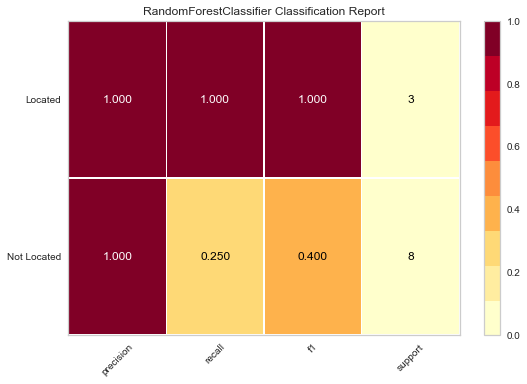

In [1114]:
classes = ["Not Located", "Located"]  
# Instantiate the classification model and visualizer

visualizer = ClassificationReport(modelRF_NZV, classes=classes, support=True)

visualizer.fit(X_trainClassi, y_trainClassi)  # Fit the visualizer and the model
visualizer.score(X_testClassi, y_testClassi)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [1051]:
# Count the number of yes and no values that are returned
DDD = dict(zip(*np.unique(target_predRF_NZV, return_counts=True)))
print(DDD)


{'0101': 2, '0102': 3, '02021': 15, '02022': 5, '02031': 1, '02032': 2, '02132': 2, '02161': 2, '02162': 4, '02221': 1, '02222': 8, '02271': 4, '02272': 1, '02281': 2, '02282': 3, '02291': 3, '02292': 3, '02301': 6, '02302': 1, '02311': 2, '02312': 3, '02352': 2, '02371': 3, '02372': 1, '02381': 3, '02382': 3, '02392': 6, '02432': 1, '02441': 4, '02442': 1, '02462': 4, '02471': 10, '02472': 3, '02481': 14, '02482': 3, '02491': 5, '02492': 2, '092': 9, '12012': 5, '12021': 2, '12022': 4, '12031': 3, '12032': 4, '12041': 6, '12042': 3, '12052': 2, '12062': 3, '12072': 6, '12082': 3, '12092': 1, '12102': 8, '12152': 5, '2101': 4, '21011': 2, '21012': 11, '2102': 8, '21021': 3, '21022': 3, '21031': 6, '21032': 11, '21041': 2, '21042': 6, '21051': 3, '21052': 2, '21061': 3, '21062': 12, '21072': 9, '21082': 4, '21092': 3, '21102': 6, '21112': 4, '21122': 2, '21172': 3, '2151': 1, '2152': 2, '2161': 4, '2162': 2, '2171': 1, '2172': 3, '2181': 2, '2182': 3, '22011': 10, '22012': 9, '22021': 1

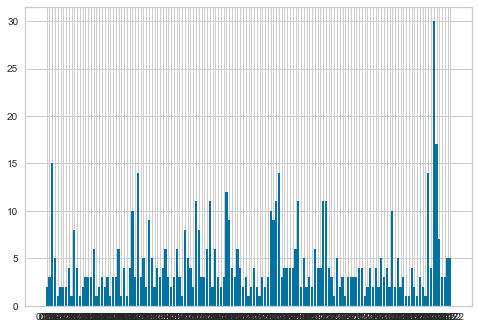

In [1052]:
# graph the number of yes and no values returned
# https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary
plt.bar(range(len(DDD)), list(DDD.values()), align='center')
plt.xticks(range(len(DDD)), list(DDD.keys()))

plt.show()

In [ ]:
## Random Forest Tuned with Original Data

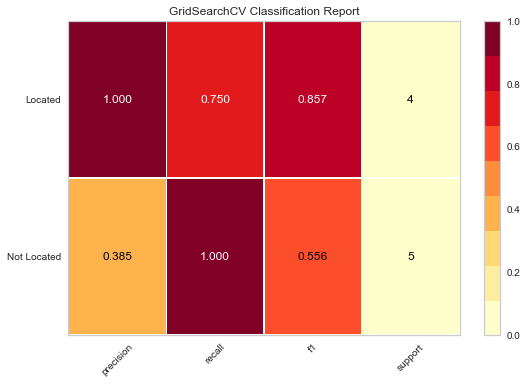

In [1115]:
classes = ["Not Located", "Located"]
# Instantiate the classification model and visualizer

visualizer = ClassificationReport(modelRFTun, classes=classes, support=True)

visualizer.fit(X_trainClassOrig, y_trainClassOrig)  # Fit the visualizer and the model
visualizer.score(X_testClassOrig, y_testClassOrig)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [1054]:
# Count the number of yes and no values that are returned
E = dict(zip(*np.unique(target_predRFTun, return_counts=True)))
print(E)


{'0101': 12, '0102': 4, '02021': 12, '02022': 1, '02031': 2, '02032': 3, '02132': 2, '02161': 3, '02162': 5, '02221': 4, '02222': 8, '02291': 3, '02292': 9, '02301': 3, '02311': 2, '02312': 1, '02372': 3, '02381': 24, '02432': 2, '02441': 9, '02442': 1, '02452': 1, '02462': 3, '02471': 14, '02472': 2, '02481': 13, '02482': 4, '02491': 1, '12012': 14, '12022': 3, '12041': 9, '12042': 1, '12052': 3, '12062': 2, '12072': 6, '12082': 2, '12092': 2, '12102': 3, '12152': 3, '2101': 2, '21011': 2, '21012': 9, '2102': 23, '21022': 7, '21031': 6, '21032': 10, '21041': 5, '21042': 3, '21051': 2, '21052': 4, '21061': 2, '21062': 12, '21072': 7, '21082': 2, '21092': 5, '21102': 6, '21112': 6, '21122': 5, '21172': 2, '2151': 1, '2152': 3, '2161': 1, '2171': 2, '2172': 3, '2182': 2, '22011': 10, '22012': 14, '22021': 9, '22022': 12, '22031': 3, '22032': 6, '22041': 6, '22042': 5, '22052': 3, '22061': 9, '22062': 7, '22072': 2, '22082': 7, '22092': 7, '221': 5, '22102': 3, '22112': 2, '22121': 3, '22

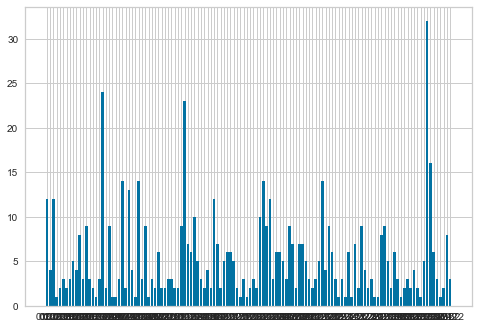

In [1055]:
# graph the number of yes and no values returned
# https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary
plt.bar(range(len(E)), list(E.values()), align='center')
plt.xticks(range(len(E)), list(E.keys()))

plt.show()

## Random Forest Tuned with Near Zero Variance Features Removed

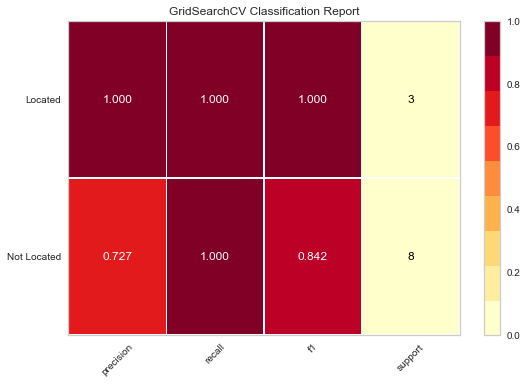

In [1179]:
classes = ["Not Located", "Located"]
# Instantiate the classification model and visualizer

visualizerb = ClassificationReport(modelRFNZVTun, classes=classes, support=True)

visualizerb.fit(X_trainClassi, y_trainClassi)  # Fit the visualizer and the model
visualizerb.score(X_testClassi, y_testClassi)  # Evaluate the model on the test data
g = visualizerb.poof()             # Draw/show/poof the data

In [ ]:
# Count the number of yes and no values that are returned
EE = dict(zip(*np.unique(target_predRFNZVTun, return_counts=True)))
print(EE)


In [ ]:
# graph the number of yes and no values returned
# https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary
plt.bar(range(len(EE)), list(EE.values()), align='center')
plt.xticks(range(len(EE)), list(EE.keys()))

plt.show()

### CART

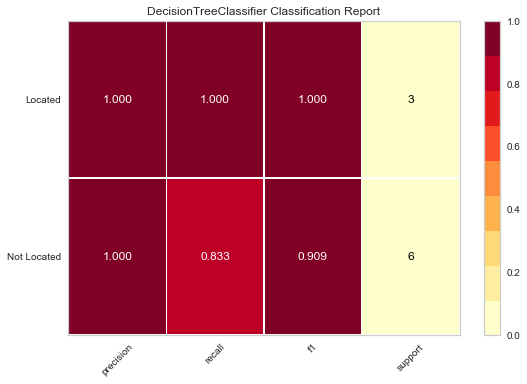

In [1116]:
#CART
classes = ["Not Located", "Located"]
# Instantiate the classification model and visualizer

visualizerK = ClassificationReport(modelCART_STD, classes=classes, support=True)

visualizerK.fit(X_trainClassiSTD, y_trainClassiSTD)  # Fit the visualizer and the model
visualizerK.score(X_testClassiSTD, y_testClassiSTD)  # Evaluate the model on the test data
gh = visualizerK.poof()             # Draw/show/poof the data

# Best Model

## 1st Runner Up: Random Forest Original Data Non Tuned

In [1174]:
# This model was chosen to be run first against all of the Building 1 data, but performance metrics were 
# not as good as expected. 

### Create Train and Test Set All Data Building 1

In [1117]:
#features
featuresClassicA = ds_compLocID.iloc[:,0:520]
print('Summary of feature sample')
featuresClassicA.head()

Summary of feature sample


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [1118]:
#dependent variable
depVarClassicA = ds_compLocID['LoID']
depVarClassicA.head()

0    21062
1    21062
2    21032
3    21022
5    21052
Name: LoID, dtype: object

In [1119]:
#Training Set (Feature Space: X Training)   2600 rows--half of the rows from the BUILDINGID 1 subset
X_trainClassOrigAllB1 = (featuresClassicA)
X_trainClassOrigAllB1.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [1120]:
#Dependent Variable Training Set (y Training) 2600 rows
y_trainClassOrigAllB1 = depVarClassicA
y_trainClassOrigAllB1_count = len(y_trainClassOrigAllB1.index)
print('The number of observations in the Y training set are:',str(y_trainClassOrig_count))
y_trainClassOrigAllB1.head()

The number of observations in the Y training set are: 2600


0    21062
1    21062
2    21032
3    21022
5    21052
Name: LoID, dtype: object

### Cross Validation

In [1121]:
# Creates X_testClassi and y_testClassi from above
# y_testClassi is ground truth
X_trainClassOrigAllB1, X_testClassOrigAllB1, y_trainClassOrigAllB1, y_testClassOrigAllB1 = train_test_split(X_trainClassOrigAllB1, y_trainClassOrigAllB1)
X_trainClassOrigAllB1.shape, X_testClassOrigAllB1.shape, y_trainClassOrigAllB1.shape, y_testClassOrigAllB1.shape, 

((3897, 520), (1299, 520), (3897,), (1299,))

### Execution

In [1141]:
# Run initially with defaults. 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#num_trees=100 ` 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 
modelRFB1=RandomForestClassifier()


In [1142]:
modelRFB1 = modelRFB1.fit(X_trainClassOrigAllB1,y_trainClassOrigAllB1)
modelRFB1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [457]:
# more results from loaded model
print('The RF scores per cv split, score array, train, test: ', 
      cross_val_score(modelRFB1, X_trainClassOrigAllB1, y_trainClassOrigAllB1,cv=kfold)) 

The RF scores per cv split, score array, train, test:  [0.70545977 0.76840491 0.75747508]


In [1143]:
# Make predictions using the test set
target_predRFB1 = modelRFB1.predict(X_testClassOrigAllB1)

In [1144]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassOrigAllB1, target_predRFB1, normalize = True)


0.7806004618937644

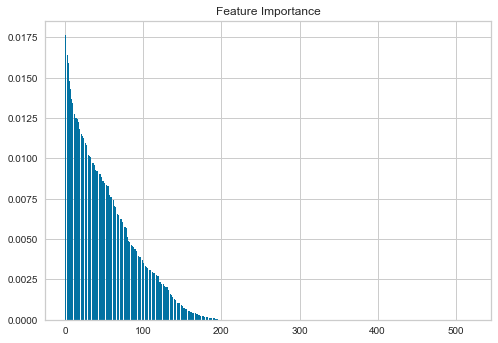

In [1145]:
# https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/
# feature importance
importances = modelRFB1.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [ds_compLocID.columns[i] for i in indices < 15]
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_trainClassOrigAllB1.shape[1]), importances[indices])

# Add feature names as x-axis labels
#plt.xticks(range(X_trainClassOrigAllB1.shape[1]), names, rotation=90)

# Show plot
plt.show()

## not very helpful graph

In [1146]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelRFB1.sav'

In [1147]:
# save model LR using pickle to .sav file
pickle.dump(modelRFB1, open(filename, 'wb'))

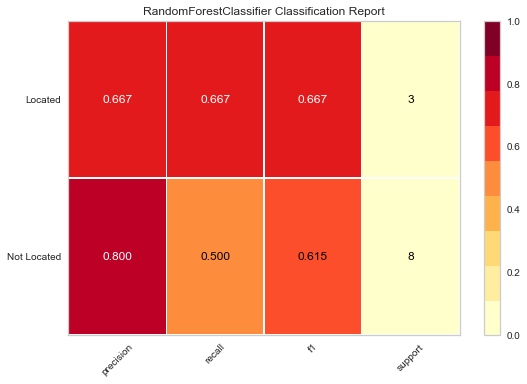

In [1148]:
classes = ["Not Located", "Located"] 
# Instantiate the classification model and visualizer

visualizer = ClassificationReport(modelRFB1, classes=classes, support=True)

visualizer.fit(X_trainClassOrigAllB1, y_trainClassOrigAllB1)  # Fit the visualizer and the model
visualizer.score(X_testClassOrigAllB1, y_testClassOrigAllB1)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

# The Top Model:  Random Forest Untuned with Standardized Data

In [1173]:
# This model had high accuracy and kappa scored, plus very good precision, recall and f1 measurements

### Create Train and Test Set All Data Building 1

In [1151]:
#features
featuresClassSTDAllB1 = ds_compLocIDSTD
print('Summary of feature sample')
featuresClassSTDAllB1.head()

Summary of feature sample


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LoID
0,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21062
1,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21062
2,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,-3.175882,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21032
3,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21022
5,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21052


In [1153]:
#dependent variable
depVarClassSTDAllB1 = ds_compLocIDSTD['LoID']
depVarClassSTDAllB1.head()

0    21062
1    21062
2    21032
3    21022
5    21052
Name: LoID, dtype: object

In [1154]:
#Training Set (Feature Space: X Training)   2600 rows--half of the rows from the BUILDINGID 1 subset
X_trainClassSTDAllB1 = (featuresClassSTDAllB1)
X_trainClassSTDAllB1.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LoID
0,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21062
1,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21062
2,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,-3.175882,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21032
3,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21022
5,0.0,0.0,0.0,0.0,0.0,0.238387,0.0,0.345578,0.0,0.130469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21052


In [1158]:
#Dependent Variable Training Set (y Training) all rows
y_trainClassSTDAllB1 = depVarClassSTDAllB1
y_trainClassSTDAllB1_count = len(y_trainClassSTDAllB1.index)
print('The number of observations in the Y training set are:',str(y_trainClassSTDAllB1_count))
y_trainClassSTDAllB1.head()

The number of observations in the Y training set are: 5196


0    21062
1    21062
2    21032
3    21022
5    21052
Name: LoID, dtype: object

### Cross Validation

In [1161]:

# y_test is ground truth
X_trainClassSTDAllB1, X_testClassSTDAllB1, y_trainClassSTDAllB1, y_testClassSTDAllB1 = train_test_split(X_trainClassSTDAllB1, y_trainClassSTDAllB1)
X_trainClassSTDAllB1.shape, X_testClassSTDAllB1.shape, y_trainClassSTDAllB1.shape, y_testClassSTDAllB1.shape, 

((3897, 521), (1299, 521), (3897,), (1299,))

### Execution

In [ ]:
# Run initially with defaults. 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#num_trees=100 ` 
kfold=RepeatedKFold(n_splits=10,n_repeats=10,random_state=None) 
modelRFB1STD=RandomForestClassifier()


In [1163]:
modelRFB1STD = modelRFB1STD.fit(X_trainClassSTDAllB1,y_trainClassSTDAllB1)
modelRFB1STD

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1175]:
# more results from loaded model
print('The RF scores per cv split, score array, train, test: ', 
      cross_val_score(modelRFB1STD, X_trainClassSTDAllB1, y_trainClassSTDAllB1,cv=kfold)) 

The RF scores per cv split, score array, train, test:  [0.87948718 0.85128205 0.84358974 0.86410256 0.85128205 0.84871795
 0.82820513 0.83547558 0.89717224 0.84318766 0.88461538 0.86666667
 0.88461538 0.86666667 0.87179487 0.87692308 0.86666667 0.85347044
 0.86118252 0.8714653  0.84358974 0.88717949 0.83076923 0.85384615
 0.87179487 0.86923077 0.85897436 0.85861183 0.85861183 0.85861183
 0.87435897 0.88461538 0.87179487 0.84102564 0.87948718 0.84871795
 0.84102564 0.84575835 0.88174807 0.85604113 0.88461538 0.86153846
 0.85384615 0.85897436 0.86410256 0.86923077 0.86923077 0.84318766
 0.85347044 0.84832905 0.85384615 0.86666667 0.86923077 0.85641026
 0.81794872 0.87692308 0.84102564 0.87660668 0.85347044 0.85089974
 0.84358974 0.85897436 0.86923077 0.82307692 0.88205128 0.87948718
 0.84358974 0.88431877 0.84318766 0.86375321 0.86923077 0.85897436
 0.88974359 0.87692308 0.84615385 0.83333333 0.84358974 0.86375321
 0.89203085 0.88174807 0.86153846 0.84871795 0.88974359 0.84102564
 0.8538

In [1164]:
# Make predictions using the test set
target_predRFB1STD = modelRFB1STD.predict(X_testClassSTDAllB1)

In [1165]:
# Compare the model’s prediction with actual target values for the test set
accuracy_score(y_testClassSTDAllB1, target_predRFB1STD, normalize = True)


0.8737490377213241

In [1172]:
# Kappa Score
print ('Kappa Score : ', cohen_kappa_score(y_testClassSTDAllB1, target_predRFB1STD), '\n' )

Kappa Score :  0.8728977984607124 



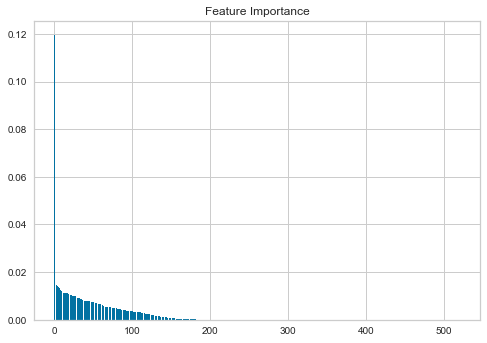

In [1167]:
# https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/
# feature importance
importances = modelRFB1STD.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [ds_compLocID.columns[i] for i in indices < 15]
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_trainClassSTDAllB1.shape[1]), importances[indices])

# Add feature names as x-axis labels
#plt.xticks(range(X_trainClassSTDAllB1.shape[1]), names, rotation=90)

# Show plot
plt.show()

## not very helpful graph

In [1146]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
filename = 'finalized_modelRFB1STD.sav'

In [1147]:
# save model LR using pickle to .sav file
pickle.dump(modelRFB1STD, open(filename, 'wb'))

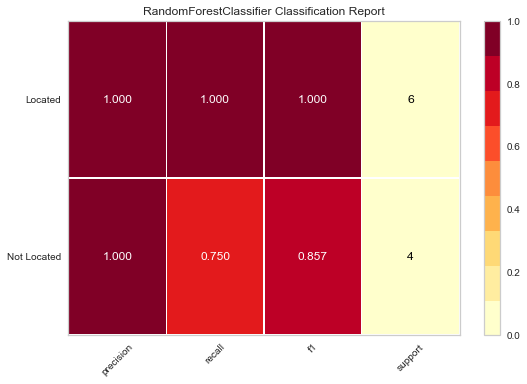

In [1168]:
classes = ["Not Located", "Located"] 
# Instantiate the classification model and visualizer

visualizer = ClassificationReport(modelRFB1STD, classes=classes, support=True)

visualizer.fit(X_trainClassSTDAllB1, y_trainClassSTDAllB1)  # Fit the visualizer and the model
visualizer.score(X_testClassSTDAllB1, y_testClassSTDAllB1)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

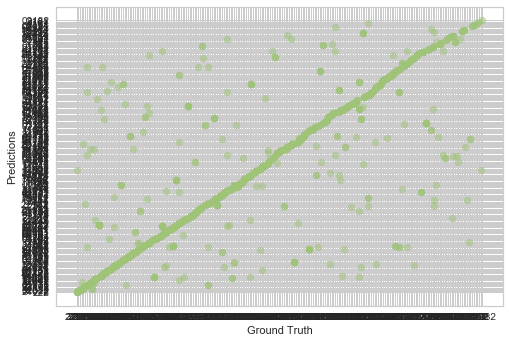

In [1170]:
plt.scatter(y_testClassSTDAllB1, target_predRFB1STD, color=['g'],alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();